#**Final Project**

## Group No: 8

**1. Akshat Kadia(202203029)**

**2. Pritesh Vadher(202203043)**

**3. Vivek Chaudhari(202201294)**

**Github:** https://github.com/akshat-11004/EDA_Project/

## Import Libraries

In [187]:
# pip install openpyxl

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_classif
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

warnings.filterwarnings('ignore')


## Data Loading

In [189]:

# df_global = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_final.xlsx', engine='openpyxl')
# df_china = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_china.xlsx', engine='openpyxl')
# df_france = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_france.xlsx', engine='openpyxl')
# df_germany = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_germany.xlsx', engine='openpyxl')
# df_finland = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_finland.xlsx', engine='openpyxl')
# df_italy = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_italy.xlsx', engine='openpyxl')
df_india = pd.read_csv('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_india.csv')
# df_romania = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_romania.xlsx', engine='openpyxl')
# df_russia = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_russia.xlsx', engine='openpyxl')
# df_us = pd.read_excel('https://raw.githubusercontent.com/akshat-11004/EDA_Project/main/DataSets/covid19_us.xlsx', engine='openpyxl')


In [190]:
df_india.sample(10)

iso_code continent location        date  total_cases  new_cases  \
794       IND      Asia    India  07-03-2022   42967315.0     4362.0   
51        IND      Asia    India  23-02-2020          7.0        0.0   
1200      IND      Asia    India  17-04-2023   44827226.0     9111.0   
644       IND      Asia    India  08-10-2021   33915569.0    21257.0   
1346      IND      Asia    India  10-09-2023   44997710.0       68.0   
1345      IND      Asia    India  09-09-2023   44997642.0       59.0   
80        IND      Asia    India  23-03-2020        434.0       74.0   
27        IND      Asia    India  30-01-2020          1.0        1.0   
1094      IND      Asia    India  01-01-2023   44678649.0      265.0   
607       IND      Asia    India  01-09-2021   32810845.0    41965.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
794             6169.286      515102.0        66.0              179.857  ...   
51                 0.000           NaN         0.0                0.000  ...   
1200            9247.143      531141.0        27.0               23.143  ...   
644            21266.000      450127.0       271.0              255.429  ...   
1346              54.857      532027.0         2.0                0.571  ...   
1345              53.714      532025.0         1.0                0.286  ...   
80                45.714           9.0         2.0                1.000  ...   
27                 0.143           NaN         0.0                0.000  ...   
1094             220.429      530705.0         3.0                1.714  ...   
607            42639.857      439020.0       460.0              466.000  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
794           20.6                   59.55                        0.53   
51            20.6                   59.55                        0.53   
1200          20.6                   59.55                        0.53   
644           20.6                   59.55                        0.53   
1346          20.6                   59.55                        0.53   
1345          20.6                   59.55                        0.53   
80            20.6                   59.55                        0.53   
27            20.6                   59.55                        0.53   
1094          20.6                   59.55                        0.53   
607           20.6                   59.55                        0.53   

      life_expectancy  human_development_index  population  \
794             69.66                    0.645  1417173120   
51              69.66                    0.645  1417173120   
1200            69.66                    0.645  1417173120   
644             69.66                    0.645  1417173120   
1346            69.66                    0.645  1417173120   
1345            69.66                    0.645  1417173120   
80              69.66                    0.645  1417173120   
27              69.66                    0.645  1417173120   
1094            69.66                    0.645  1417173120   
607             69.66                    0.645  1417173120   

      excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
794                                    NaN                          NaN   
51                                     NaN                          NaN   
1200                                   NaN                          NaN   
644                                    NaN                          NaN   
1346                                   NaN                          NaN   
1345                                   NaN                          NaN   
80                                     NaN                          NaN   
27                                     NaN                          NaN   
1094                                   NaN                          NaN   
607                                    NaN                          NaN   

      e

In [191]:
df_india.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [192]:
df_india.shape

(1390, 67)

## Observing Data

In [193]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    1390 non-null   object 
 1   continent                                   1390 non-null   object 
 2   location                                    1390 non-null   object 
 3   date                                        1390 non-null   object 
 4   total_cases                                 1358 non-null   float64
 5   new_cases                                   1382 non-null   float64
 6   new_cases_smoothed                          1377 non-null   float64
 7   total_deaths                                1315 non-null   float64
 8   new_deaths                                  1385 non-null   float64
 9   new_deaths_smoothed                         1380 non-null   float64
 10  total_cases_

In [194]:
df_india.drop(columns=['iso_code', 'continent', 'location'], inplace=True)

## Data Encoding

In [195]:
df = df_india.copy()

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 64 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        1390 non-null   object 
 1   total_cases                                 1358 non-null   float64
 2   new_cases                                   1382 non-null   float64
 3   new_cases_smoothed                          1377 non-null   float64
 4   total_deaths                                1315 non-null   float64
 5   new_deaths                                  1385 non-null   float64
 6   new_deaths_smoothed                         1380 non-null   float64
 7   total_cases_per_million                     1358 non-null   float64
 8   new_cases_per_million                       1382 non-null   float64
 9   new_cases_smoothed_per_million              1377 non-null   float64
 10  total_deaths

We have 2 variable in non numeric format. So we can find the missing values in their columns differently.


*   Let first encode them and then fill it with appropriate values.



In [197]:
df['tests_units'].isnull().sum()

559

In [198]:
df['tests_units'].nunique()

1

There is only one catagory. So we can consider the null value as 0.

* Let once replace them with just word 'Missing'.




In [199]:
df['tests_units'] = df['tests_units'].fillna('Missing')
encoder = LabelEncoder()
df['tests_units'] = encoder.fit_transform(df['tests_units'])

In [200]:
unique_encoded_values = df['tests_units'].unique()

# Get original labels before encoding
unique_labels = encoder.classes_

# Print unique encoded values and labels
for encoded_value, label in zip(unique_encoded_values, unique_labels):
    print(f"Encoded Value: {encoded_value}, Label: {label}")

Encoded Value: 0, Label: Missing
Encoded Value: 1, Label: samples tested


In [201]:
df['tests_units'].isnull().sum()

0

In [202]:
# Now get rid of date format
# Convert the column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.sample(10)

date  total_cases  new_cases  new_cases_smoothed  total_deaths  \
91   2020-04-03       2301.0      336.0             225.286          56.0   
1336 2023-08-31   44997167.0       50.0              54.429      531930.0   
352  2020-12-20   10031223.0    26624.0           24884.857      145477.0   
1057 2022-11-25   44670830.0      347.0             409.000      530604.0   
453  2021-03-31   12149335.0    53480.0           59325.286      162468.0   
1121 2023-01-28   44682530.0       93.0             107.000      530739.0   
1266 2023-06-22   44993766.0       95.0              82.857      531900.0   
746  2022-01-18   37618271.0   238018.0          248925.857      486761.0   
241  2020-08-31    3621245.0    78512.0           73556.714       64469.0   
947  2022-08-07   44145732.0    18738.0           17988.714      526689.0   

      new_deaths  new_deaths_smoothed  total_cases_per_million  \
91           6.0                5.571                    1.624   
1336         1.0                0.571                31751.355   
352        341.0              351.143                 7078.333   
1057         3.0                7.286                31521.082   
453        354.0              289.571                 8572.936   
1121         0.0                1.286                31529.338   
1266         2.0                1.000                31748.955   
746        310.0              364.000                26544.584   
241        971.0              989.571                 2555.259   
947         40.0               47.429                31150.557   

      new_cases_per_million  new_cases_smoothed_per_million  ...  \
91                    0.237                           0.159  ...   
1336                  0.035                           0.038  ...   
352                  18.787                          17.560  ...   
1057                  0.245                           0.289  ...   
453                  37.737                          41.862  ...   
1121                  0.066                           0.076  ...   
1266                  0.067                           0.058  ...   
746                 167.953                         175.650  ...   
241                  55.400                          51.904  ...   
947                  13.222                          12.693  ...   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
91            20.6                   59.55                        0.53   
1336          20.6                   59.55                        0.53   
352           20.6                   59.55                        0.53   
1057          20.6                   59.55                        0.53   
453           20.6                   59.55                        0.53   
1121          20.6                   59.55                        0.53   
1266          20.6                   59.55                        0.53   
746           20.6                   59.55                        0.53   
241           20.6                   59.55                        0.53   
947           20.6                   59.55                        0.53   

      life_expectancy  human_development_index  population  \
91              69.66                    0.645  1417173120   
1336            69.66                    0.645  1417173120   
352             69.66                    0.645  1417173120   
1057            69.66                    0.645  1417173120   
453             69.66                    0.645  1417173120   
1121            69.66                    0.645  1417173120   
1266            69.66                    0.645  1417173120   
746             69.66                    0.645  1417173120   
241             69.66                    0.645  1417173120   
947             69.66                    0.645  1417173120   

      excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
91                                     NaN                          NaN   
1336                                   

## Missing Value Analysis

### Data Visualization to analize missing values

<Axes: >

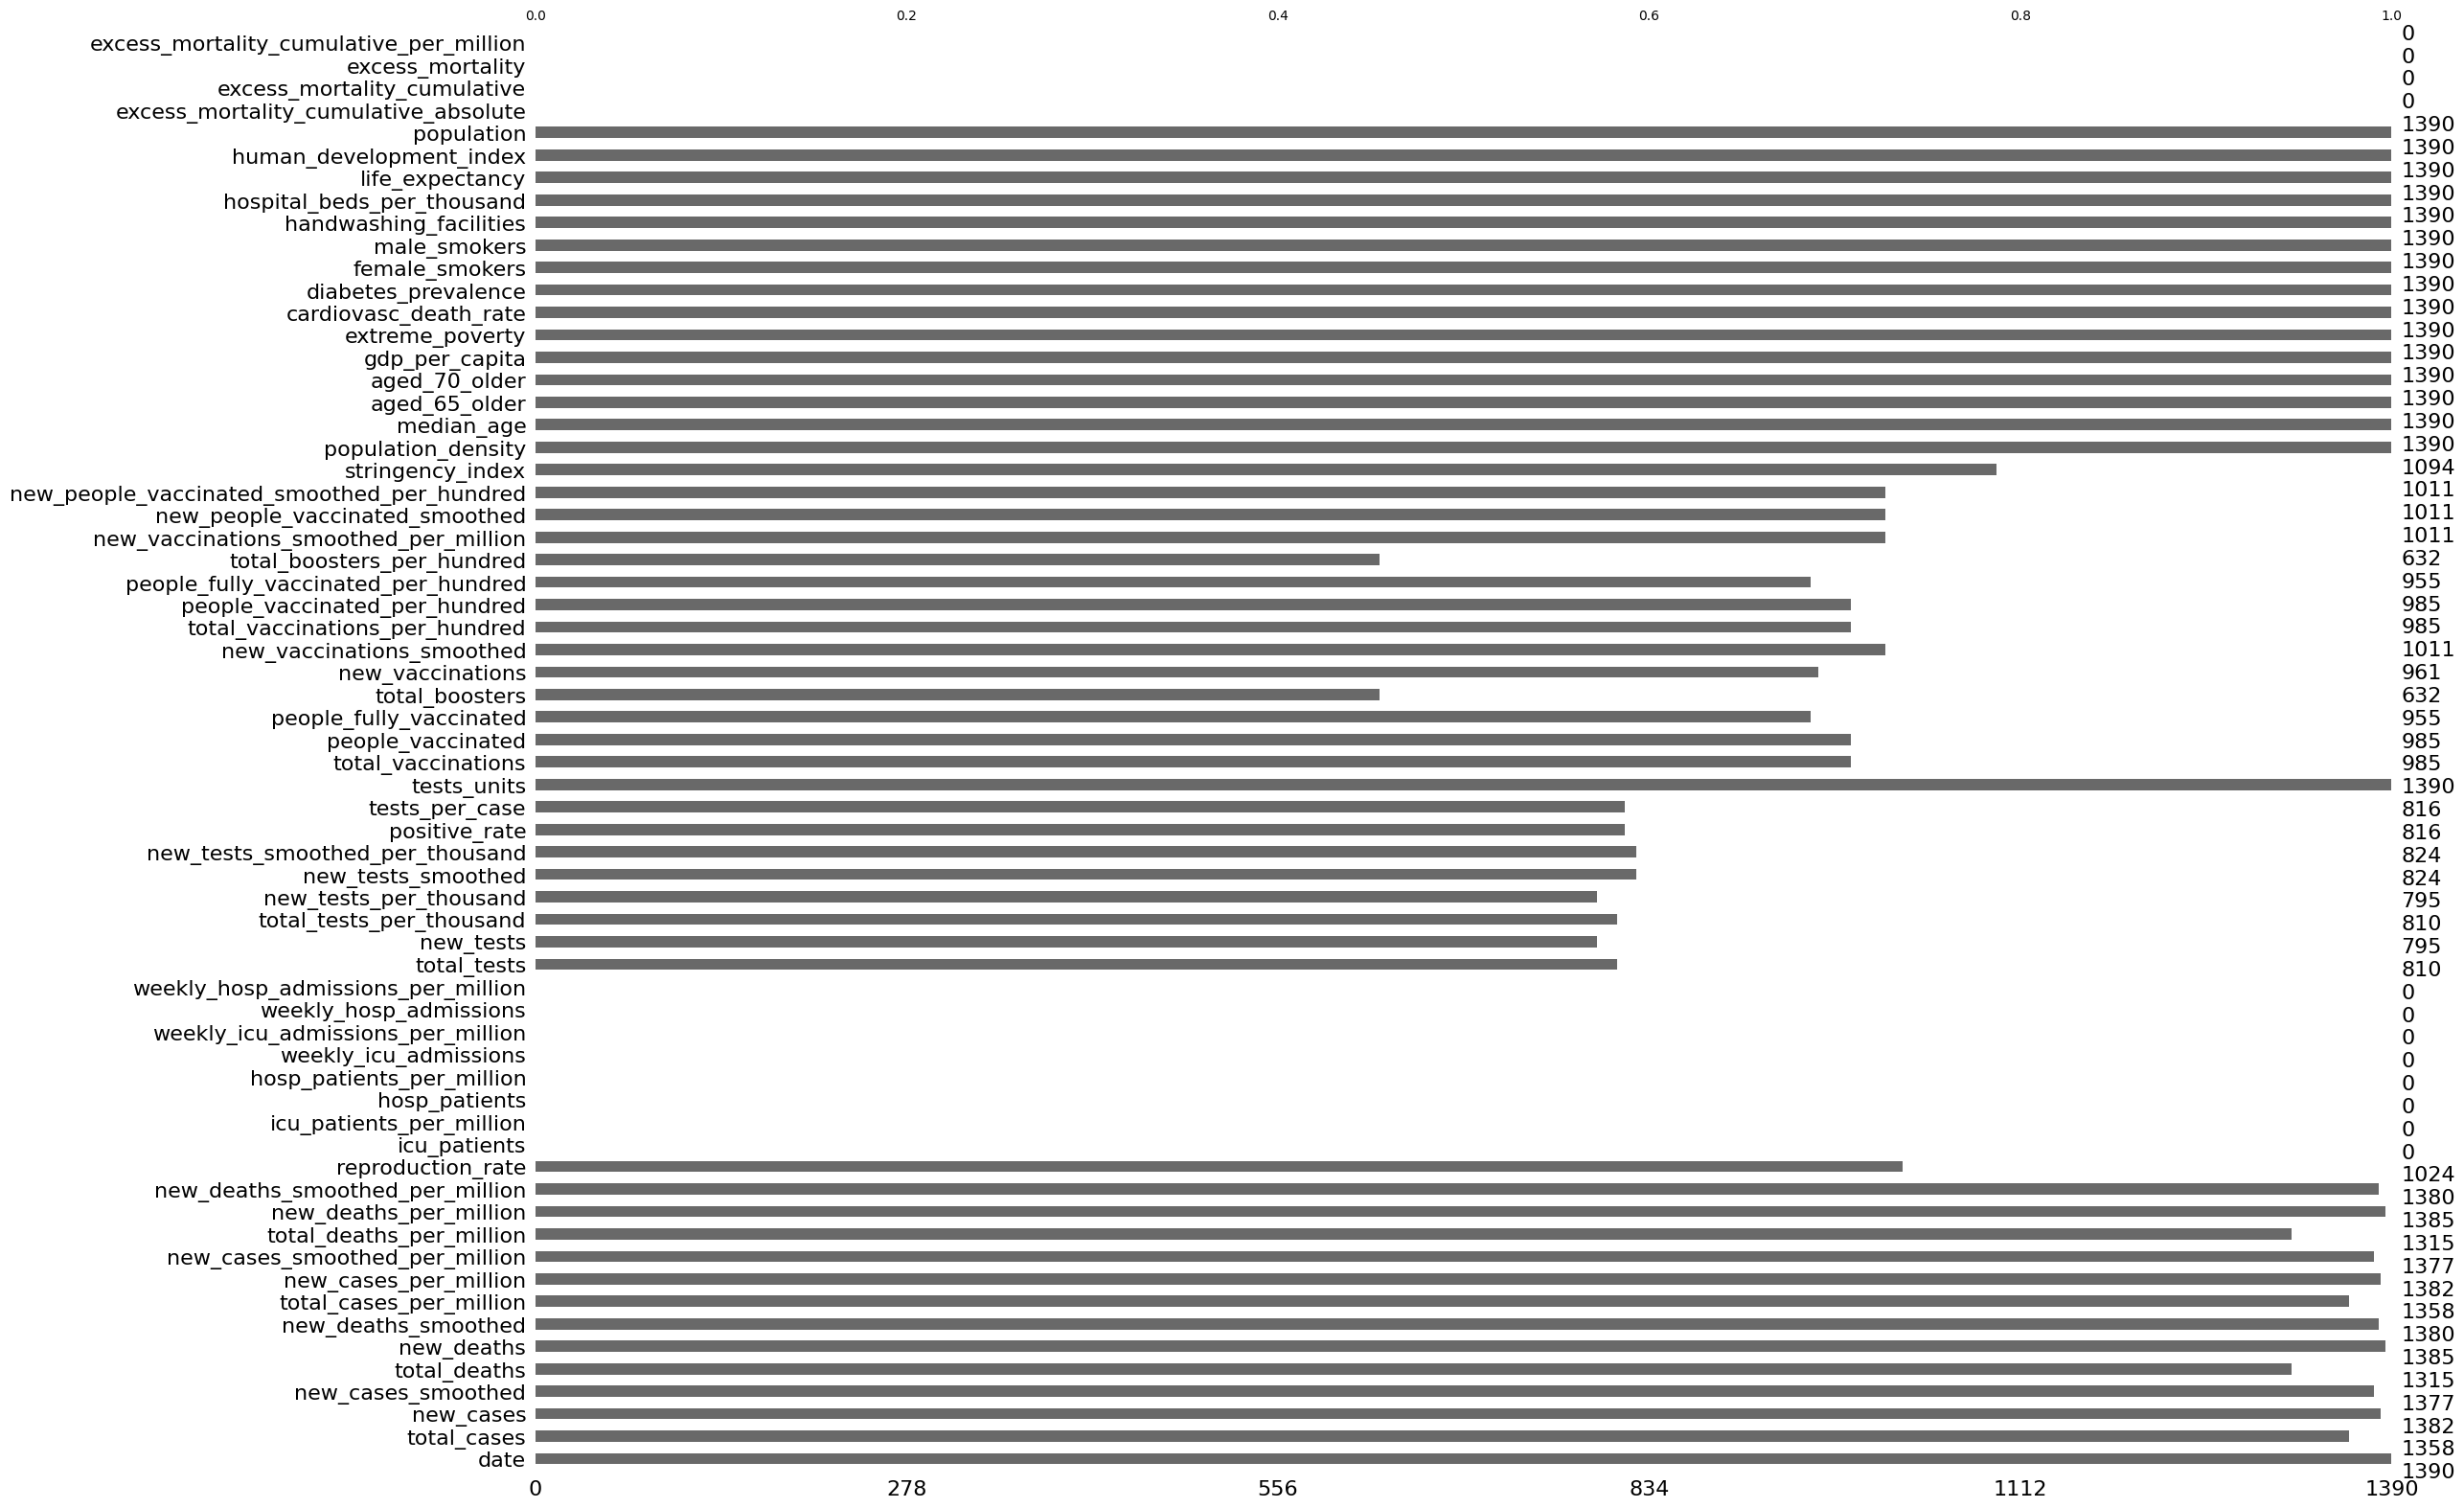

In [203]:
msno.bar(df)

<Axes: >

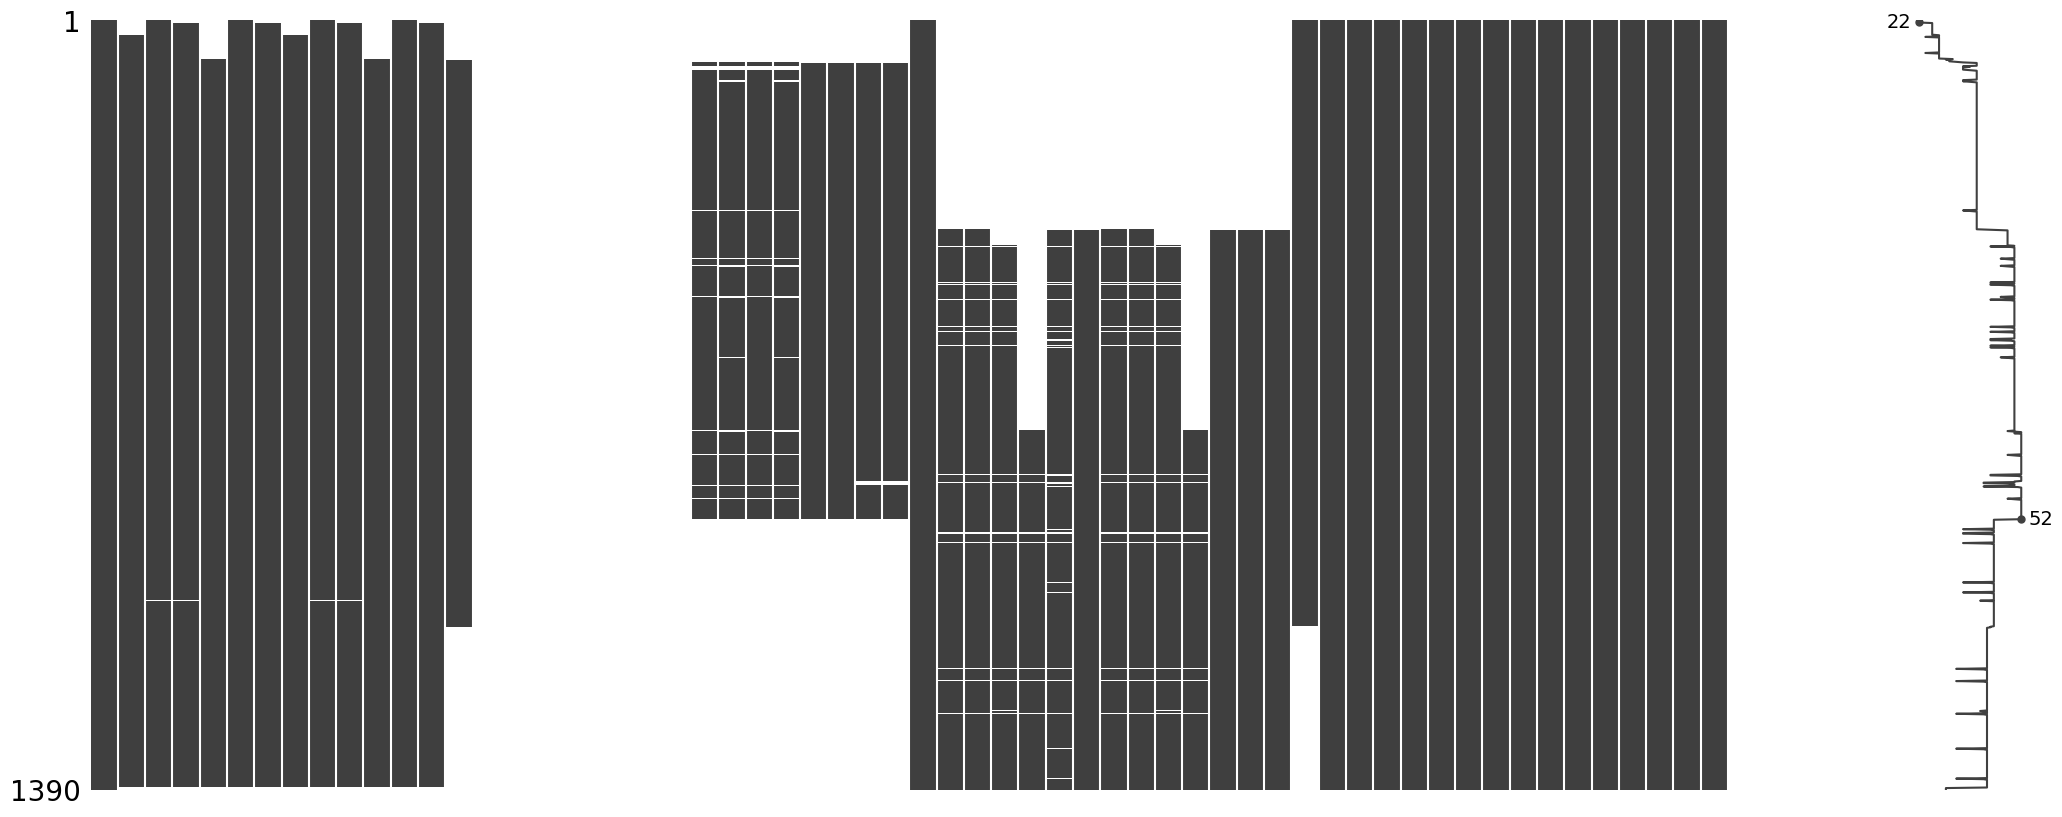

In [204]:
msno.matrix(df)

<Axes: >

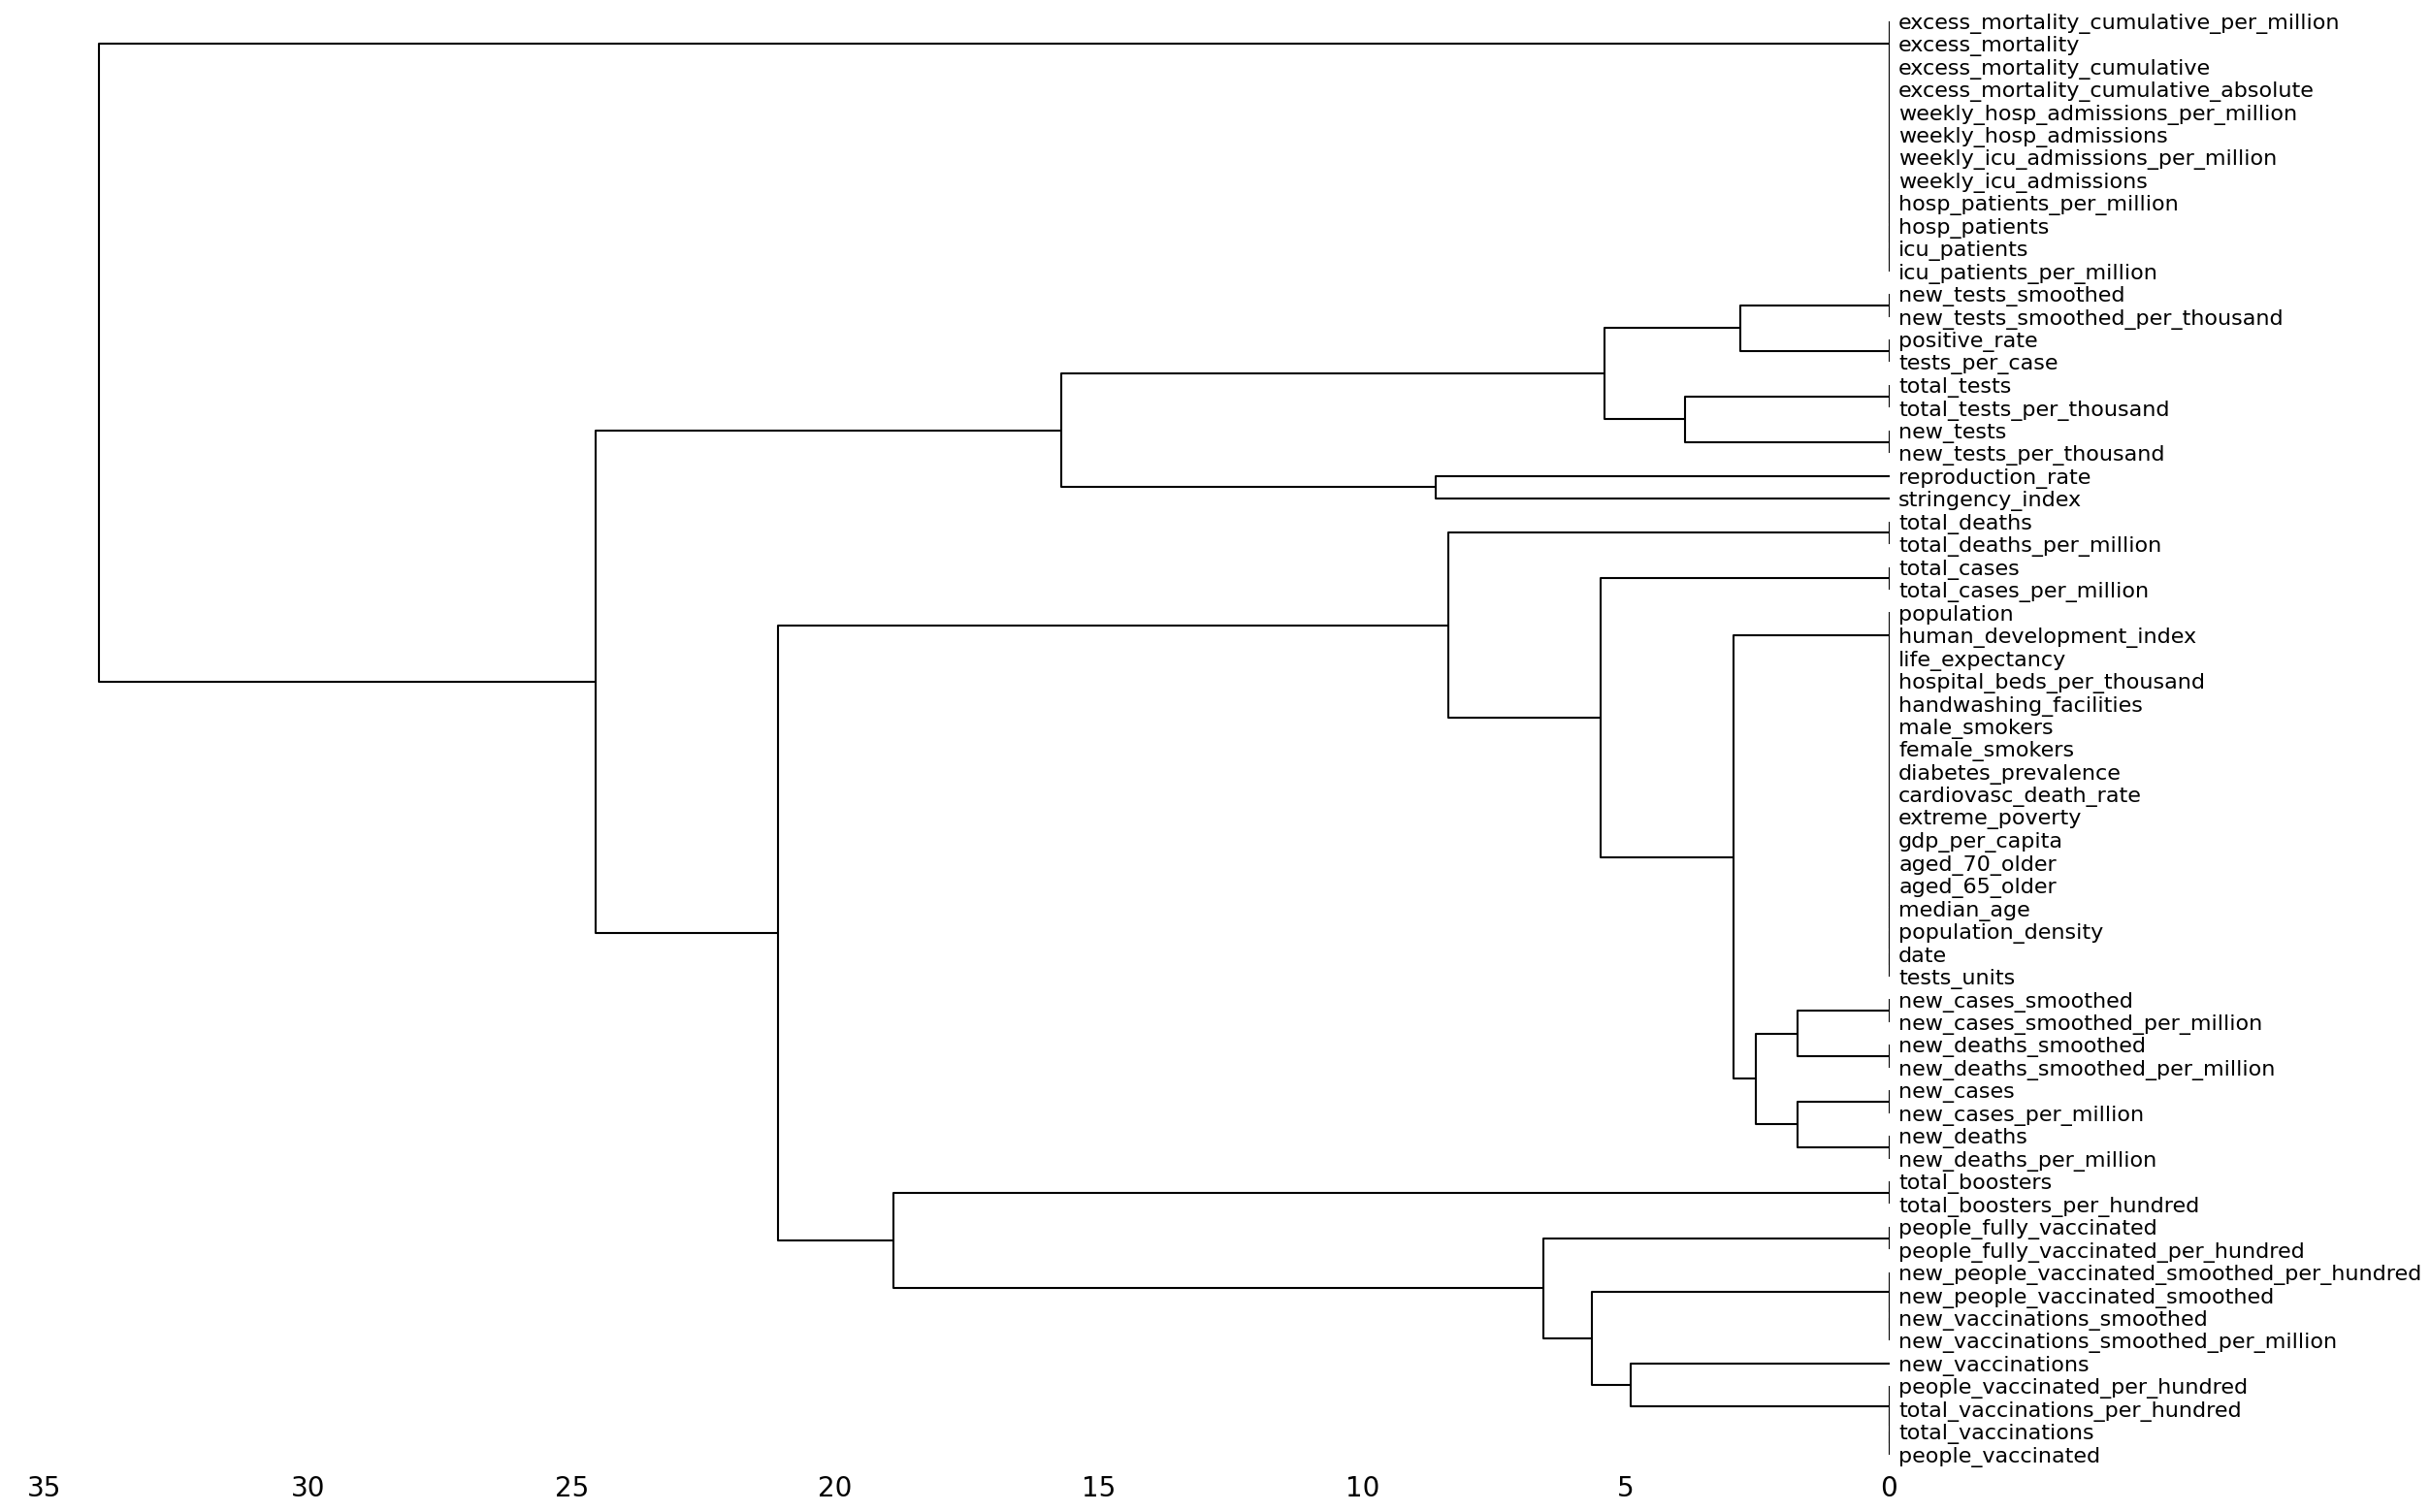

In [205]:
msno.dendrogram(df)

### Missing Value Mechanism

In [206]:
print(df.isnull().sum()/df.shape[0]*100)

date                                         0.000000
total_cases                                  2.302158
new_cases                                    0.575540
new_cases_smoothed                           0.935252
total_deaths                                 5.395683
                                              ...    
population                                   0.000000
excess_mortality_cumulative_absolute       100.000000
excess_mortality_cumulative                100.000000
excess_mortality                           100.000000
excess_mortality_cumulative_per_million    100.000000
Length: 64, dtype: float64


In [207]:
missing_percentage = (df.isnull().sum()/df.shape[0]*100)

columns_to_drop = missing_percentage[missing_percentage > 50].index
print(missing_percentage[missing_percentage > 50])
df = df.drop(columns=columns_to_drop)

icu_patients                               100.000000
icu_patients_per_million                   100.000000
hosp_patients                              100.000000
hosp_patients_per_million                  100.000000
weekly_icu_admissions                      100.000000
weekly_icu_admissions_per_million          100.000000
weekly_hosp_admissions                     100.000000
weekly_hosp_admissions_per_million         100.000000
total_boosters                              54.532374
total_boosters_per_hundred                  54.532374
excess_mortality_cumulative_absolute       100.000000
excess_mortality_cumulative                100.000000
excess_mortality                           100.000000
excess_mortality_cumulative_per_million    100.000000
dtype: float64


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 50 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        1390 non-null   datetime64[ns]
 1   total_cases                                 1358 non-null   float64       
 2   new_cases                                   1382 non-null   float64       
 3   new_cases_smoothed                          1377 non-null   float64       
 4   total_deaths                                1315 non-null   float64       
 5   new_deaths                                  1385 non-null   float64       
 6   new_deaths_smoothed                         1380 non-null   float64       
 7   total_cases_per_million                     1358 non-null   float64       
 8   new_cases_per_million                       1382 non-null   float64       
 9   new_case

In [209]:
 # Fill NaNs with ffill and remeaning with mean for numeric columns
numeric_columns = df.select_dtypes(exclude=['object']).columns
df[numeric_columns] = df[numeric_columns].fillna(method='ffill').fillna(df[numeric_columns].mean())

print(df.isnull().sum())

date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
total_tests                                   0
new_tests                                     0
total_tests_per_thousand                      0
new_tests_per_thousand                        0
new_tests_smoothed                            0
new_tests_smoothed_per_thousand               0
positive_rate                           

## Outlier Detection

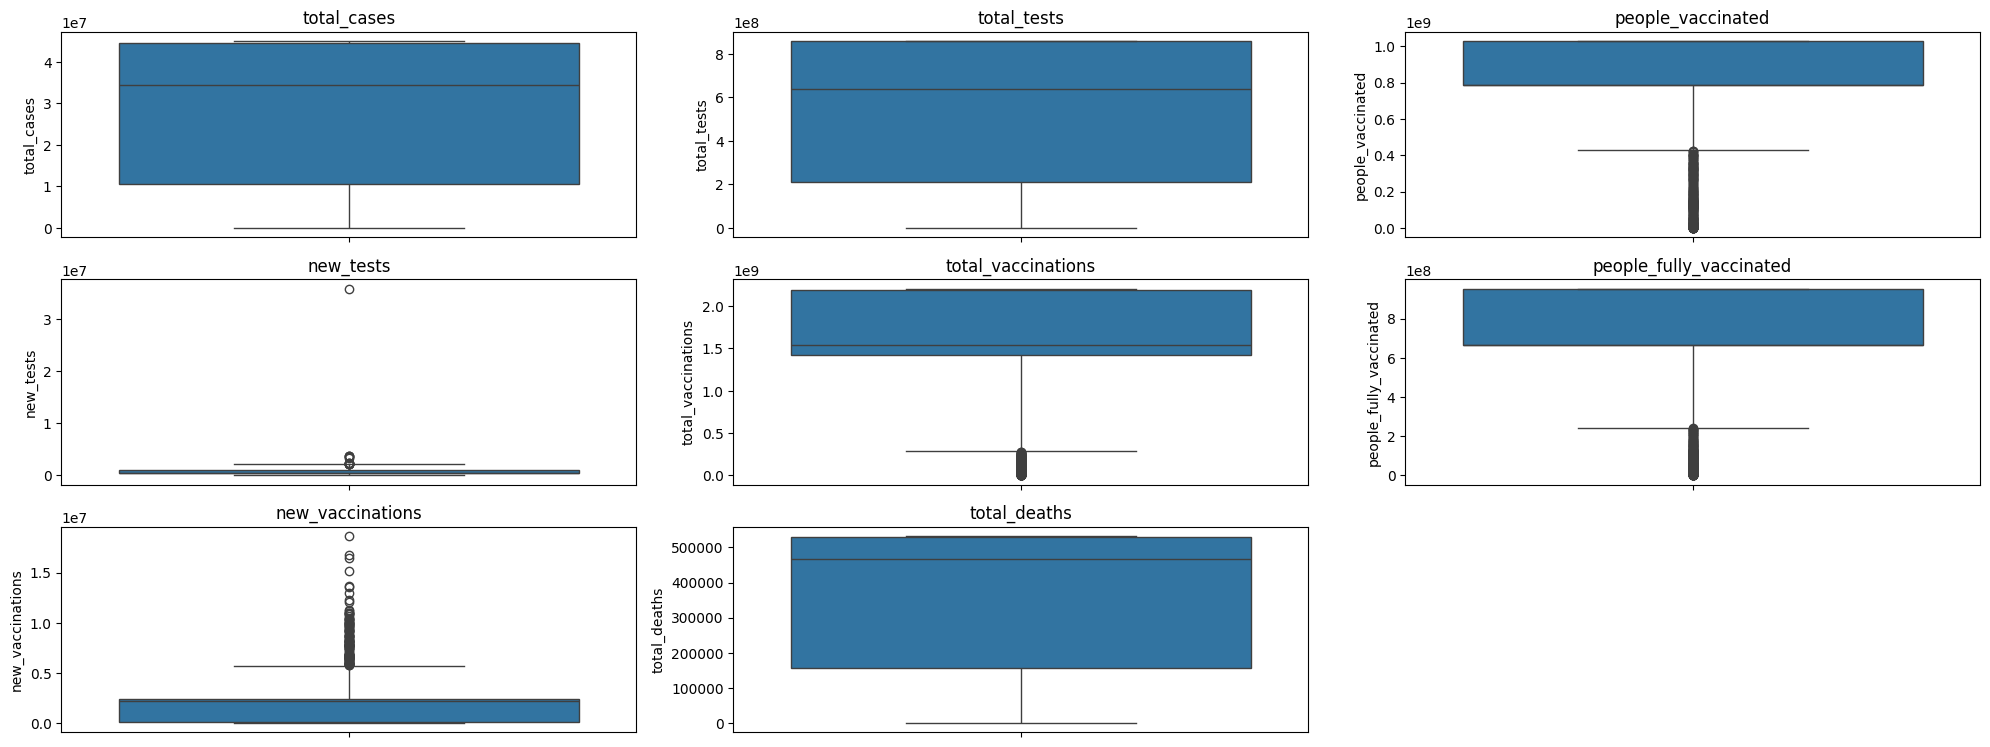

In [210]:

columns_to_plot = ['total_cases', 'total_tests', 'people_vaccinated',
                   'new_tests', 'total_vaccinations',
                   'people_fully_vaccinated', 'new_vaccinations', 'total_deaths']

# Create boxplots for each specified column
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)  # Adjust subplot grid if necessary
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [211]:
numeric_cols = df.select_dtypes(include=['number']).columns
all_outliers = pd.Series(False, index=df.index)  # Initialize with False for all rows

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for the current column
    col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Update all_outliers to include outliers from this column
    all_outliers = all_outliers | col_outliers

df_cleaned = df[~all_outliers]
print(f"Number of rows removed: {all_outliers.sum()}")
print(f"Data after cleaning: {df_cleaned.shape}")

Number of rows removed: 624
Data after cleaning: (766, 50)


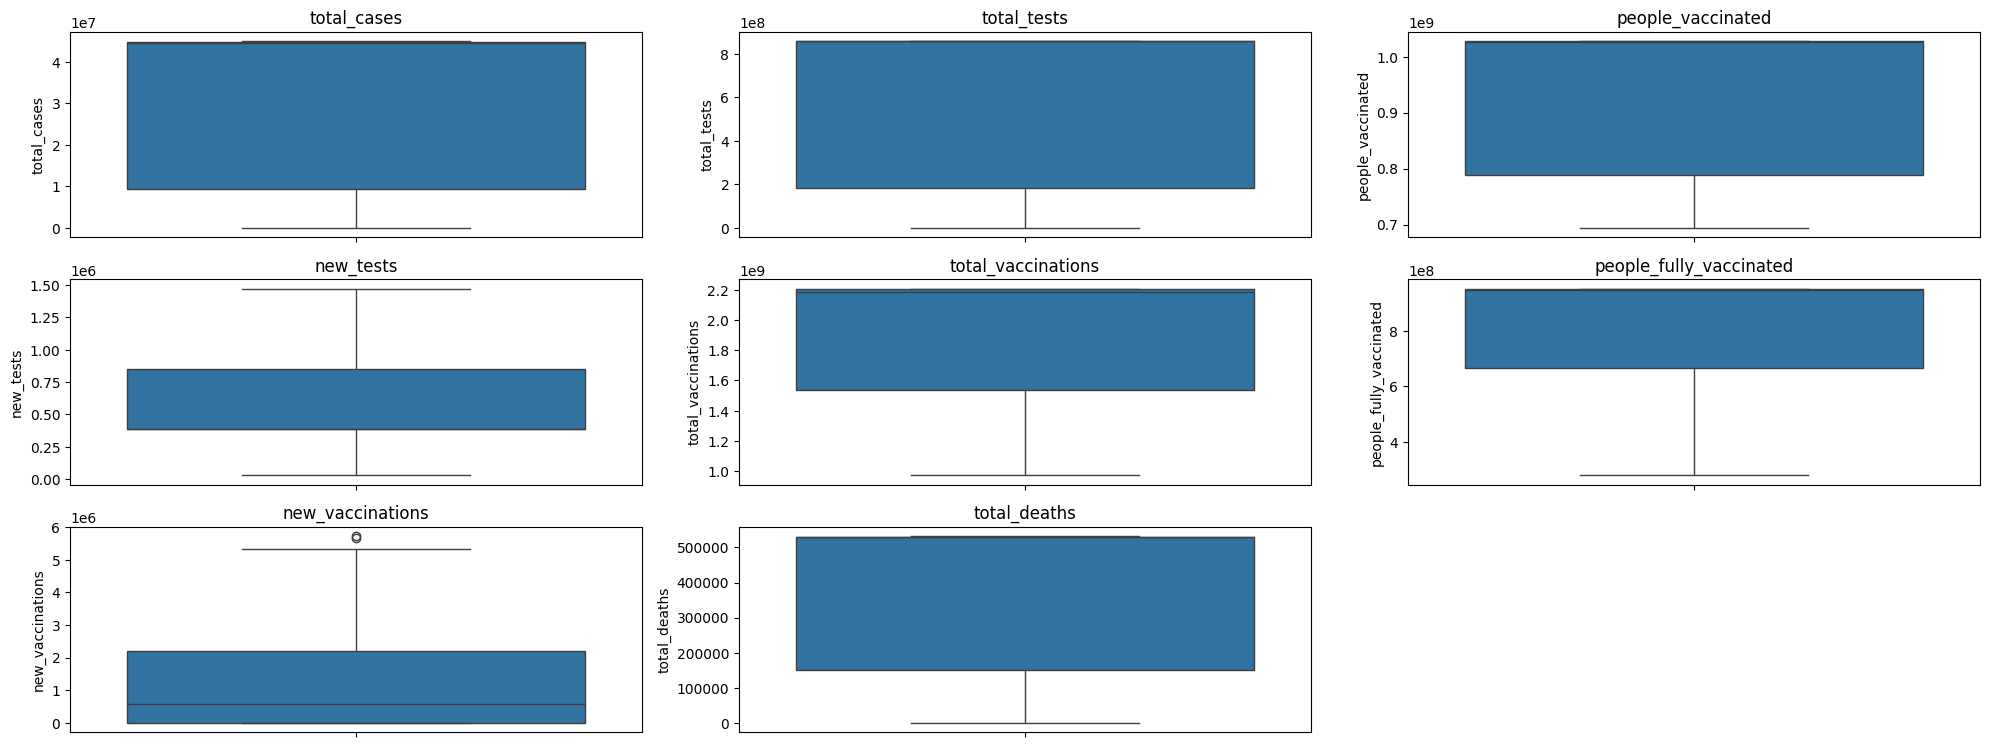

In [212]:

columns_to_plot = ['total_cases', 'total_tests', 'people_vaccinated',
                   'new_tests', 'total_vaccinations',
                   'people_fully_vaccinated', 'new_vaccinations', 'total_deaths']

# Create boxplots for each specified column
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)  # Adjust subplot grid if necessary
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

We Don't to remove outliers because they it will change our results.

## Data Visualization

### Univariate Analysis

In [27]:
filtered_features = ['total_cases','new_cases','total_tests','people_vaccinated','new_tests','positive_rate','total_vaccinations','people_fully_vaccinated','new_vaccinations','total_deaths','new_deaths']

In [28]:
df_cleaned[filtered_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 0 to 1389
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_cases              766 non-null    float64
 1   new_cases                766 non-null    float64
 2   total_tests              766 non-null    float64
 3   people_vaccinated        766 non-null    float64
 4   new_tests                766 non-null    float64
 5   positive_rate            766 non-null    float64
 6   total_vaccinations       766 non-null    float64
 7   people_fully_vaccinated  766 non-null    float64
 8   new_vaccinations         766 non-null    float64
 9   total_deaths             766 non-null    float64
 10  new_deaths               766 non-null    float64
dtypes: float64(11)
memory usage: 71.8 KB


Here all the rows are numeric columns so we didn't need to worry about plots for catagorical variables.

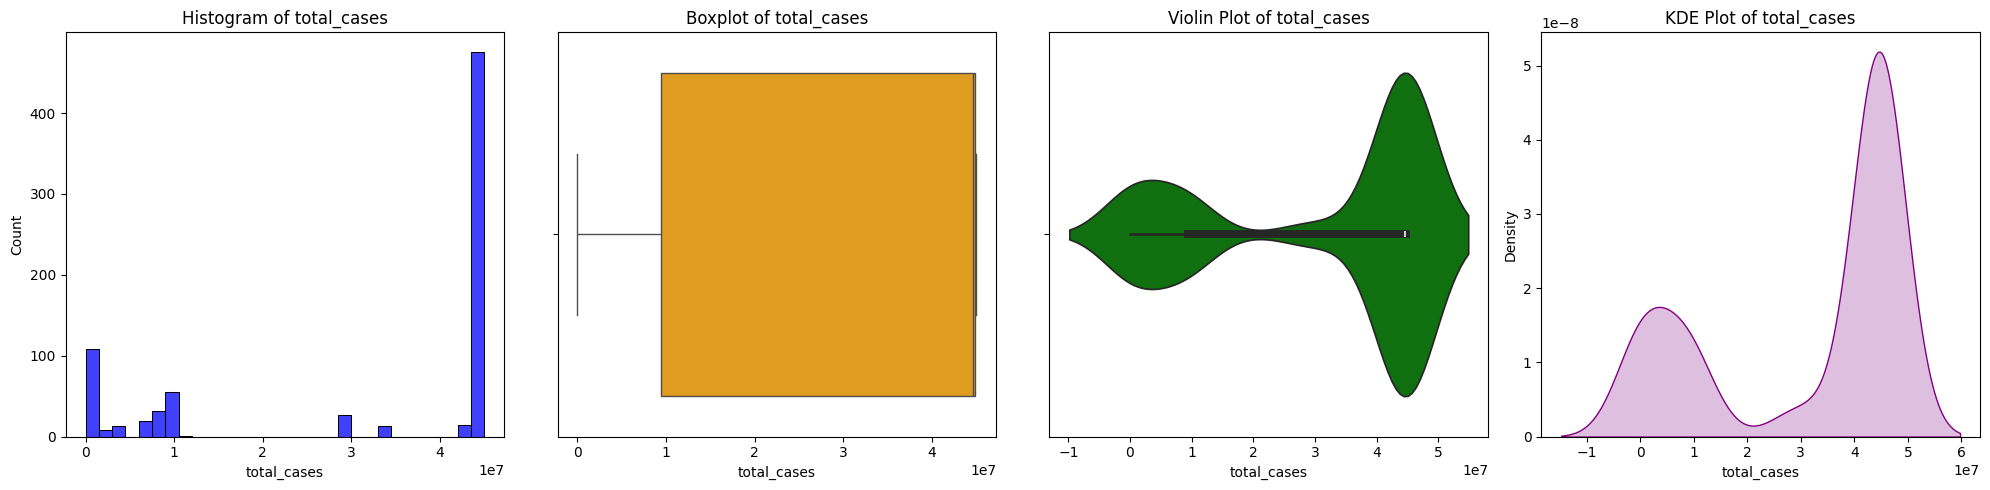

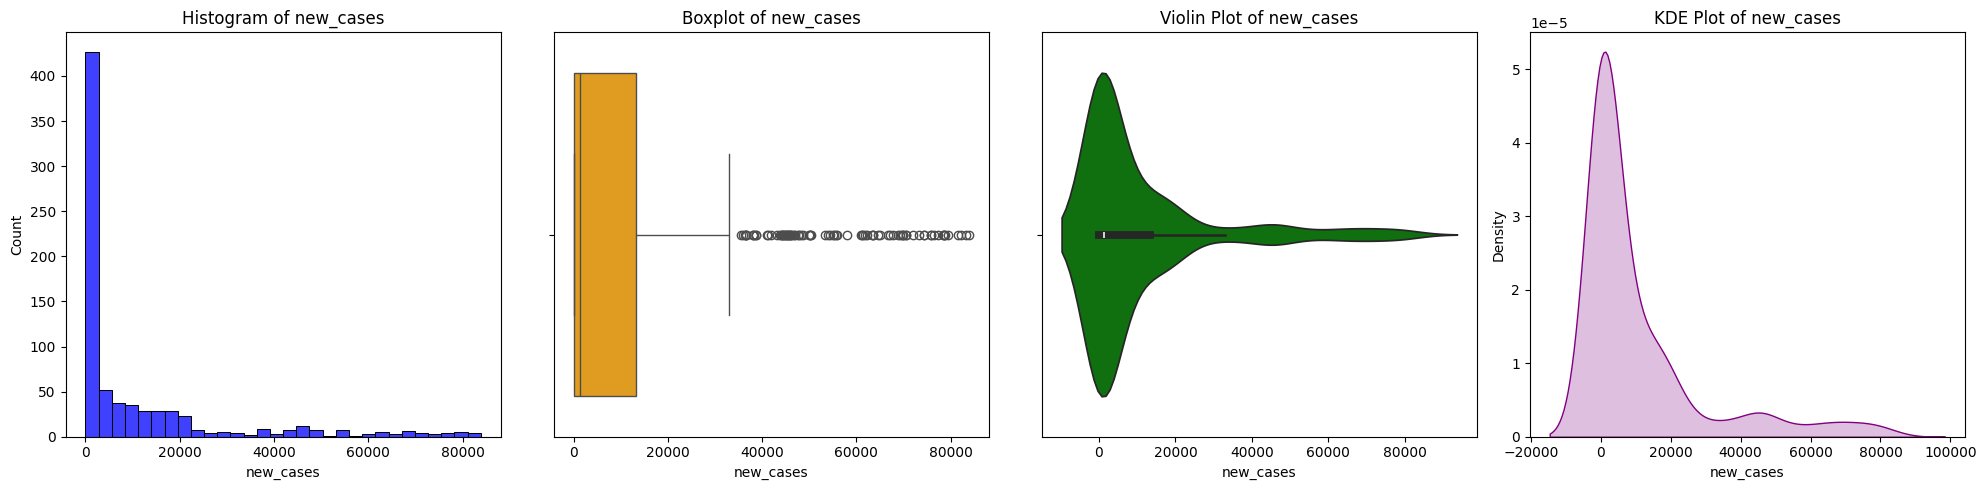

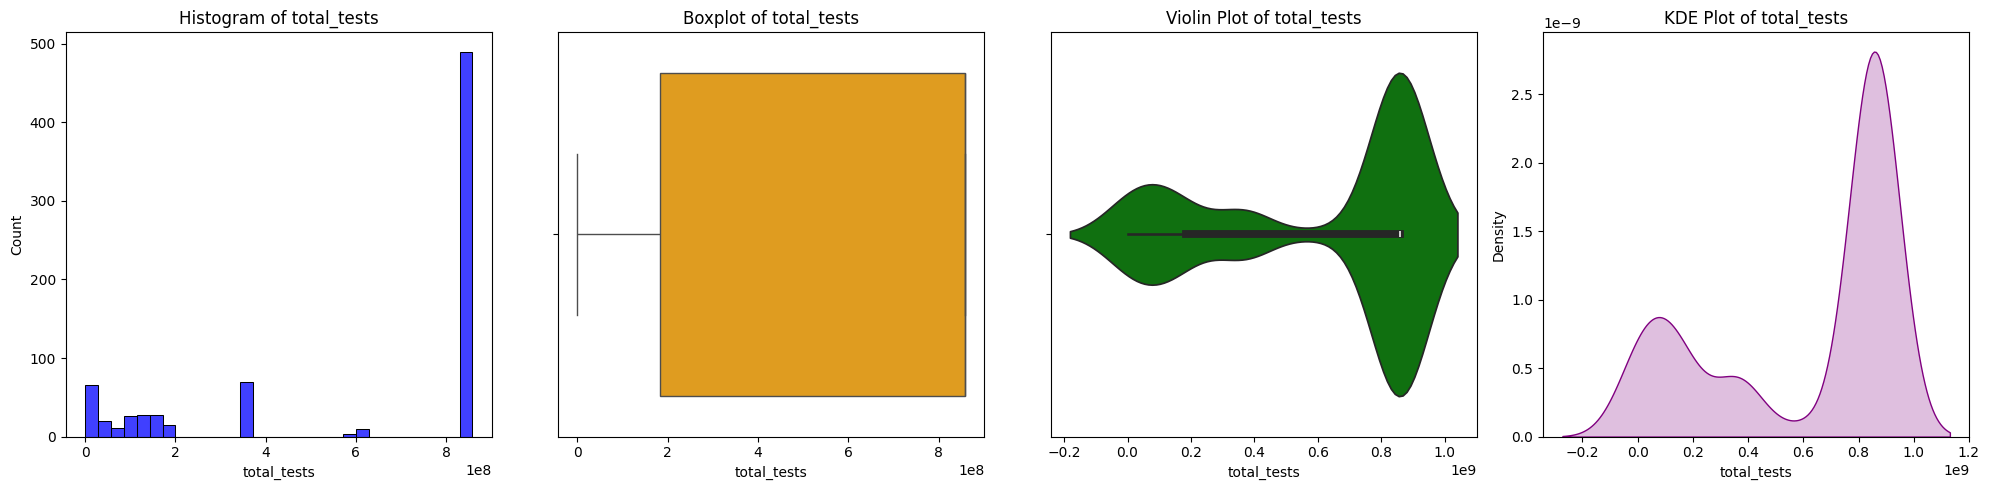

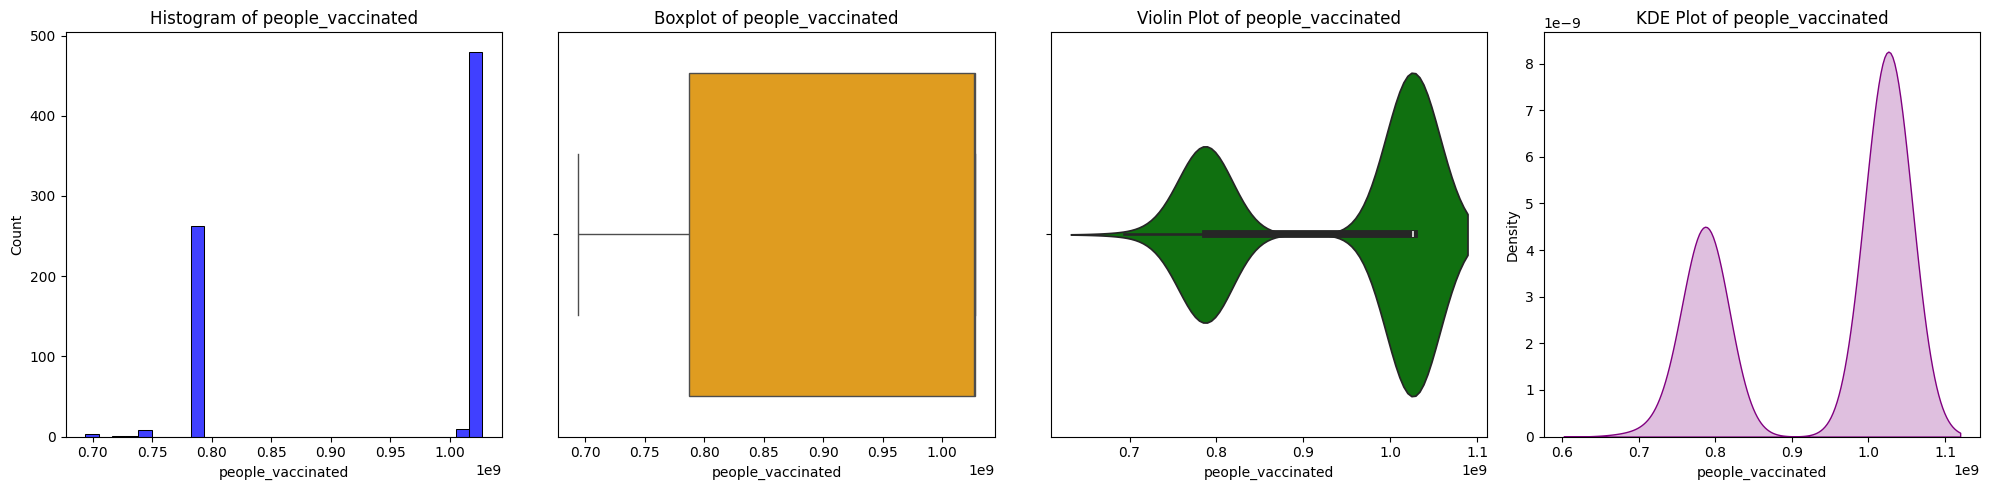

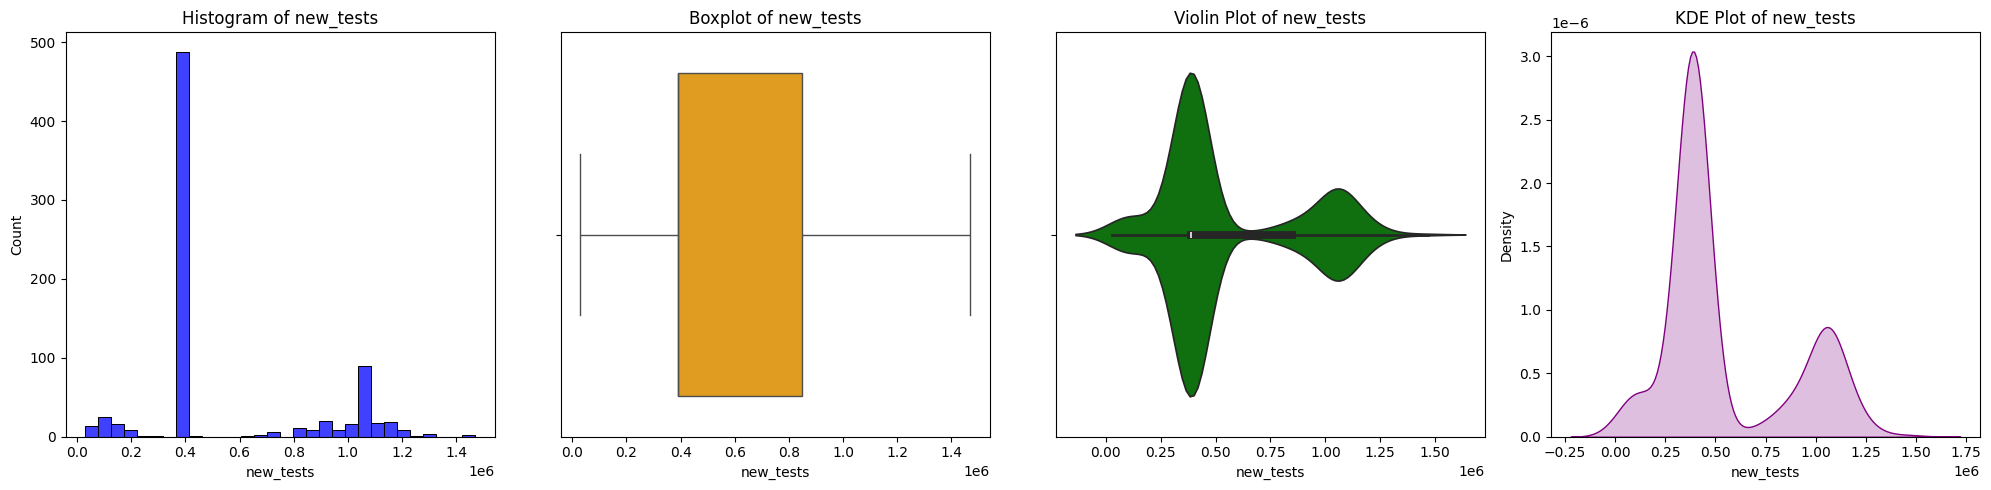

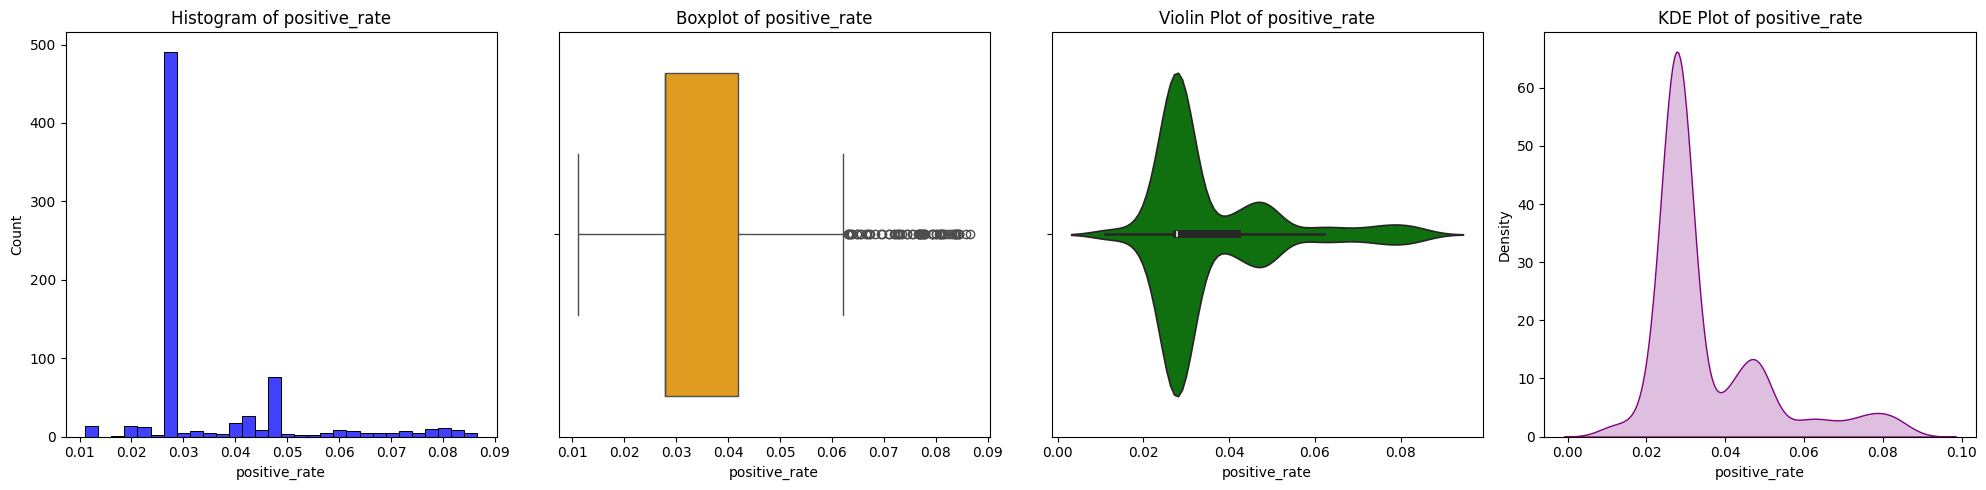

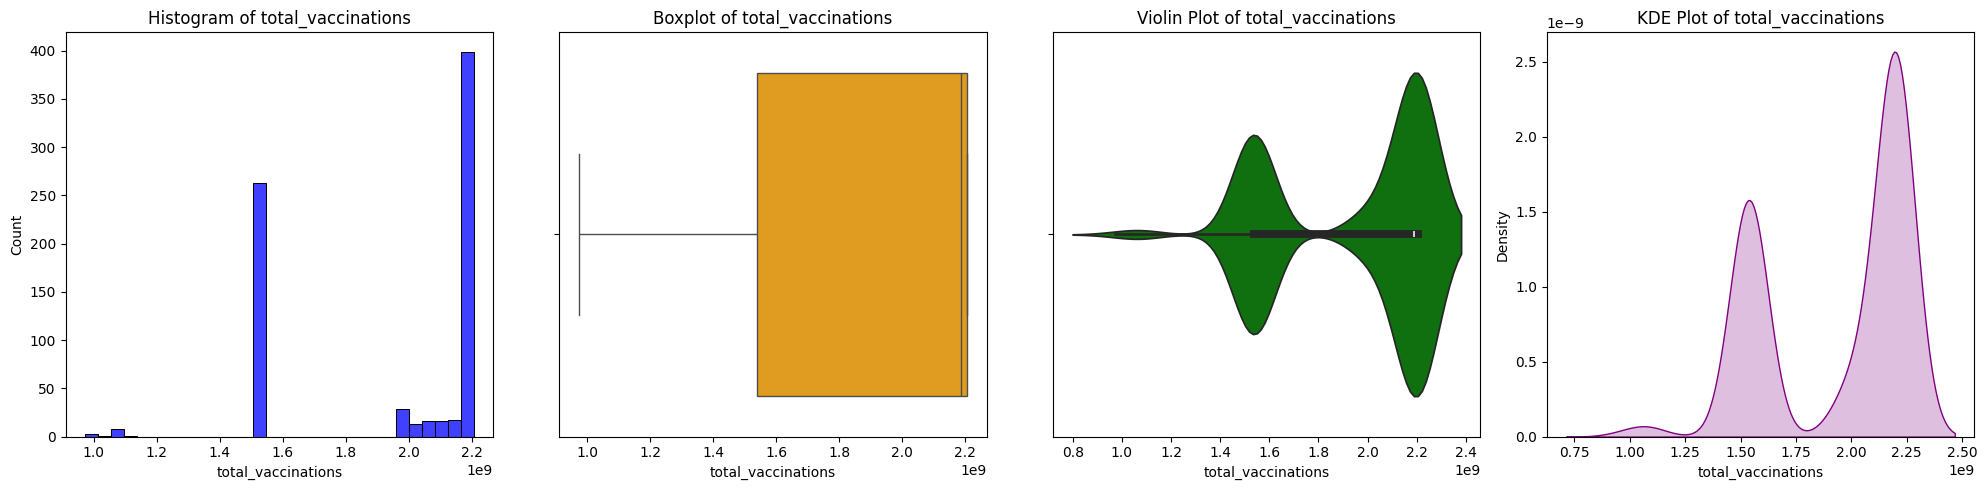

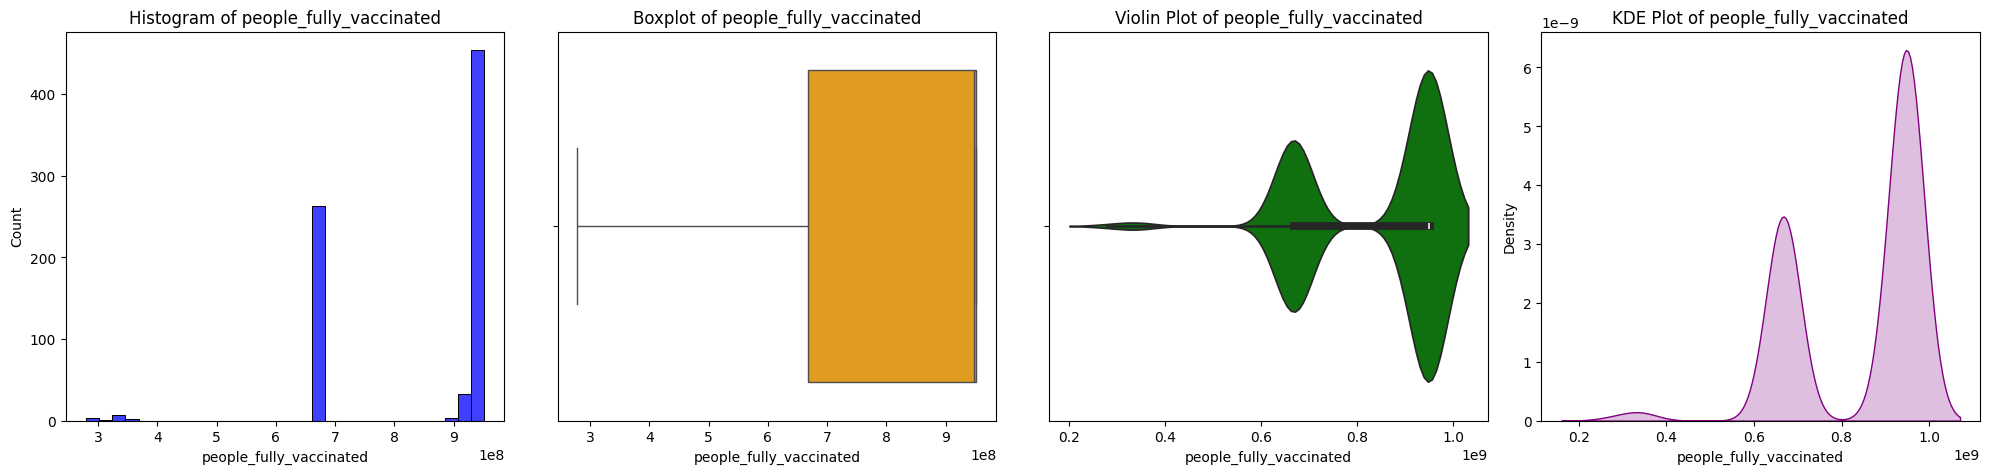

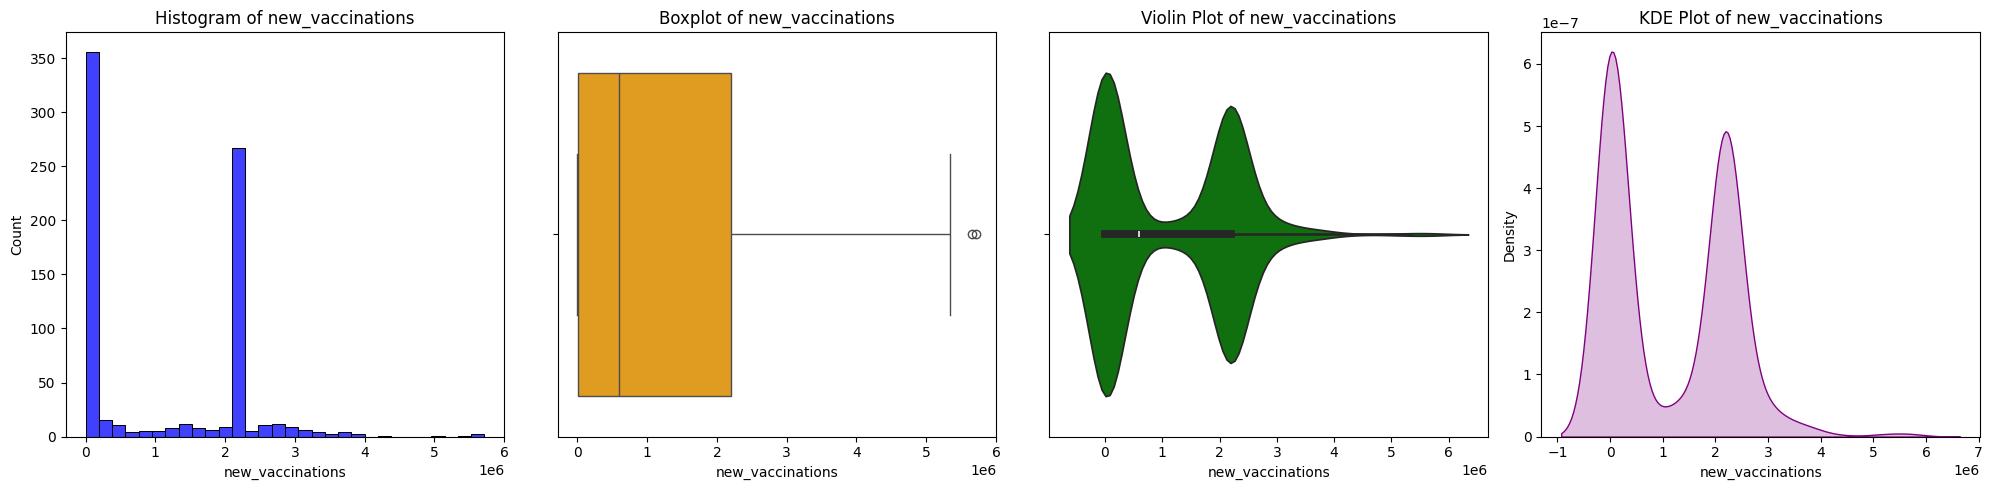

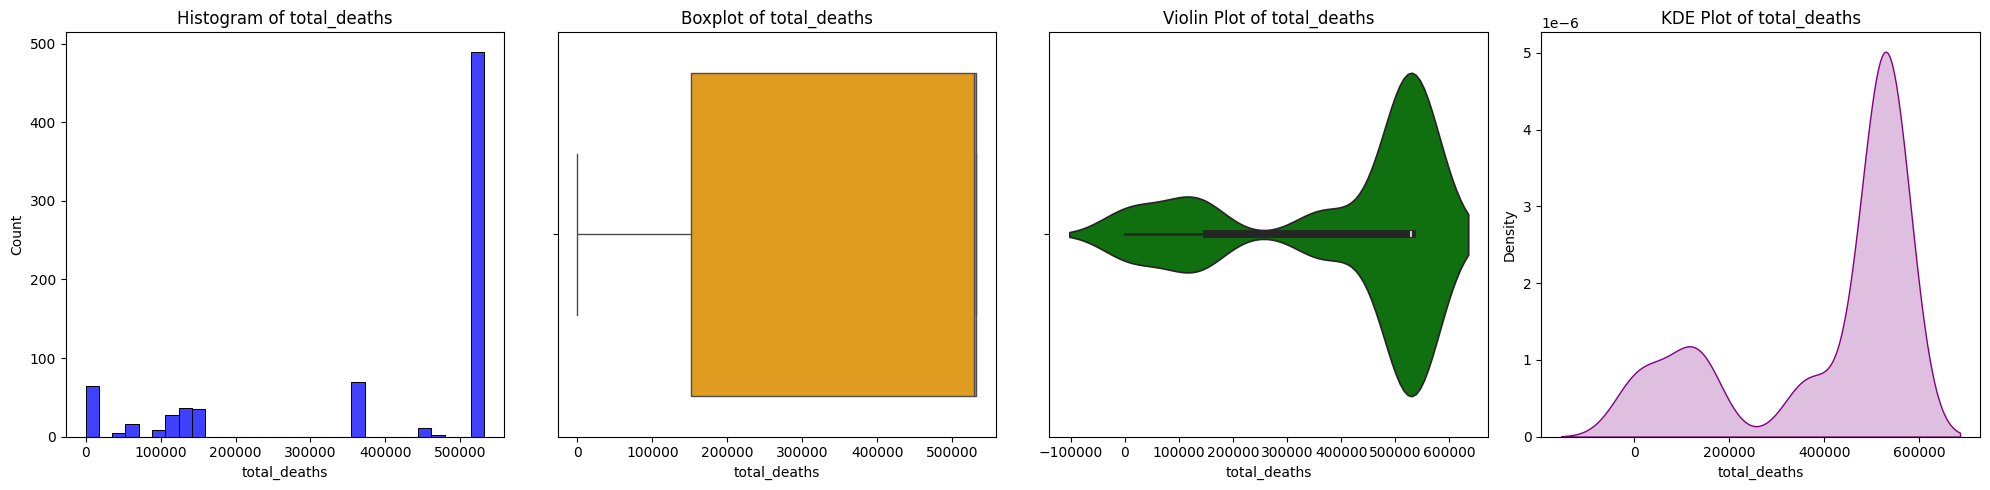

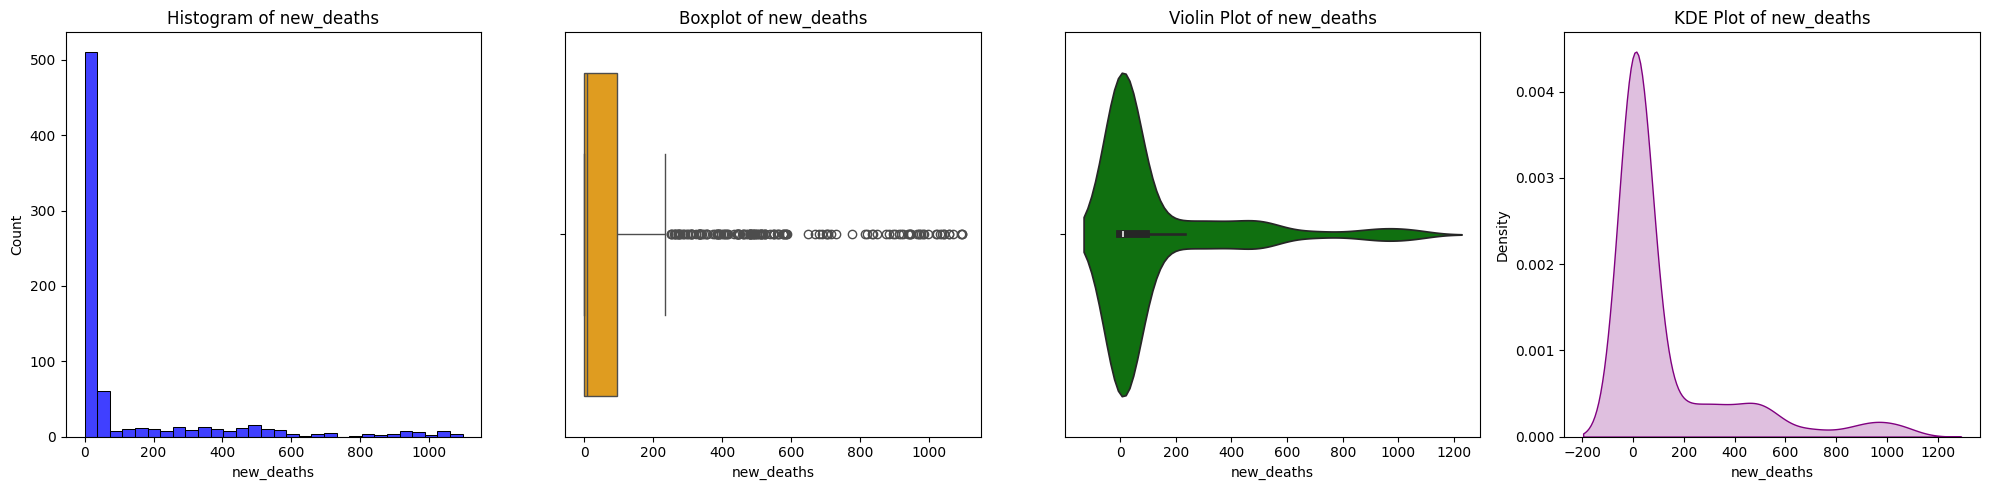

In [29]:
for column in filtered_features:
    plt.figure(figsize=(20, 5))

    if pd.api.types.is_numeric_dtype(df_cleaned[column]):
        # Numeric columns

        # Histogram
        plt.subplot(1, 4, 1)  # 1 row, 4 columns, 1st plot
        sns.histplot(df_cleaned[column], bins=30, color='blue')
        plt.title(f'Histogram of {column}')

        # Boxplot
        plt.subplot(1, 4, 2)  # 1 row, 4 columns, 2nd plot
        sns.boxplot(x=df_cleaned[column], color='orange')
        plt.title(f'Boxplot of {column}')

        # Violin plot
        plt.subplot(1, 4, 3)  # 1 row, 4 columns, 3rd plot
        sns.violinplot(x=df_cleaned[column], color='green')
        plt.title(f'Violin Plot of {column}')

        # KDE plot
        plt.subplot(1, 4, 4)  # 1 row, 4 columns, 4th plot
        sns.kdeplot(df_cleaned[column], fill=True, color='purple')
        plt.title(f'KDE Plot of {column}')

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

### Multivariate Analysis

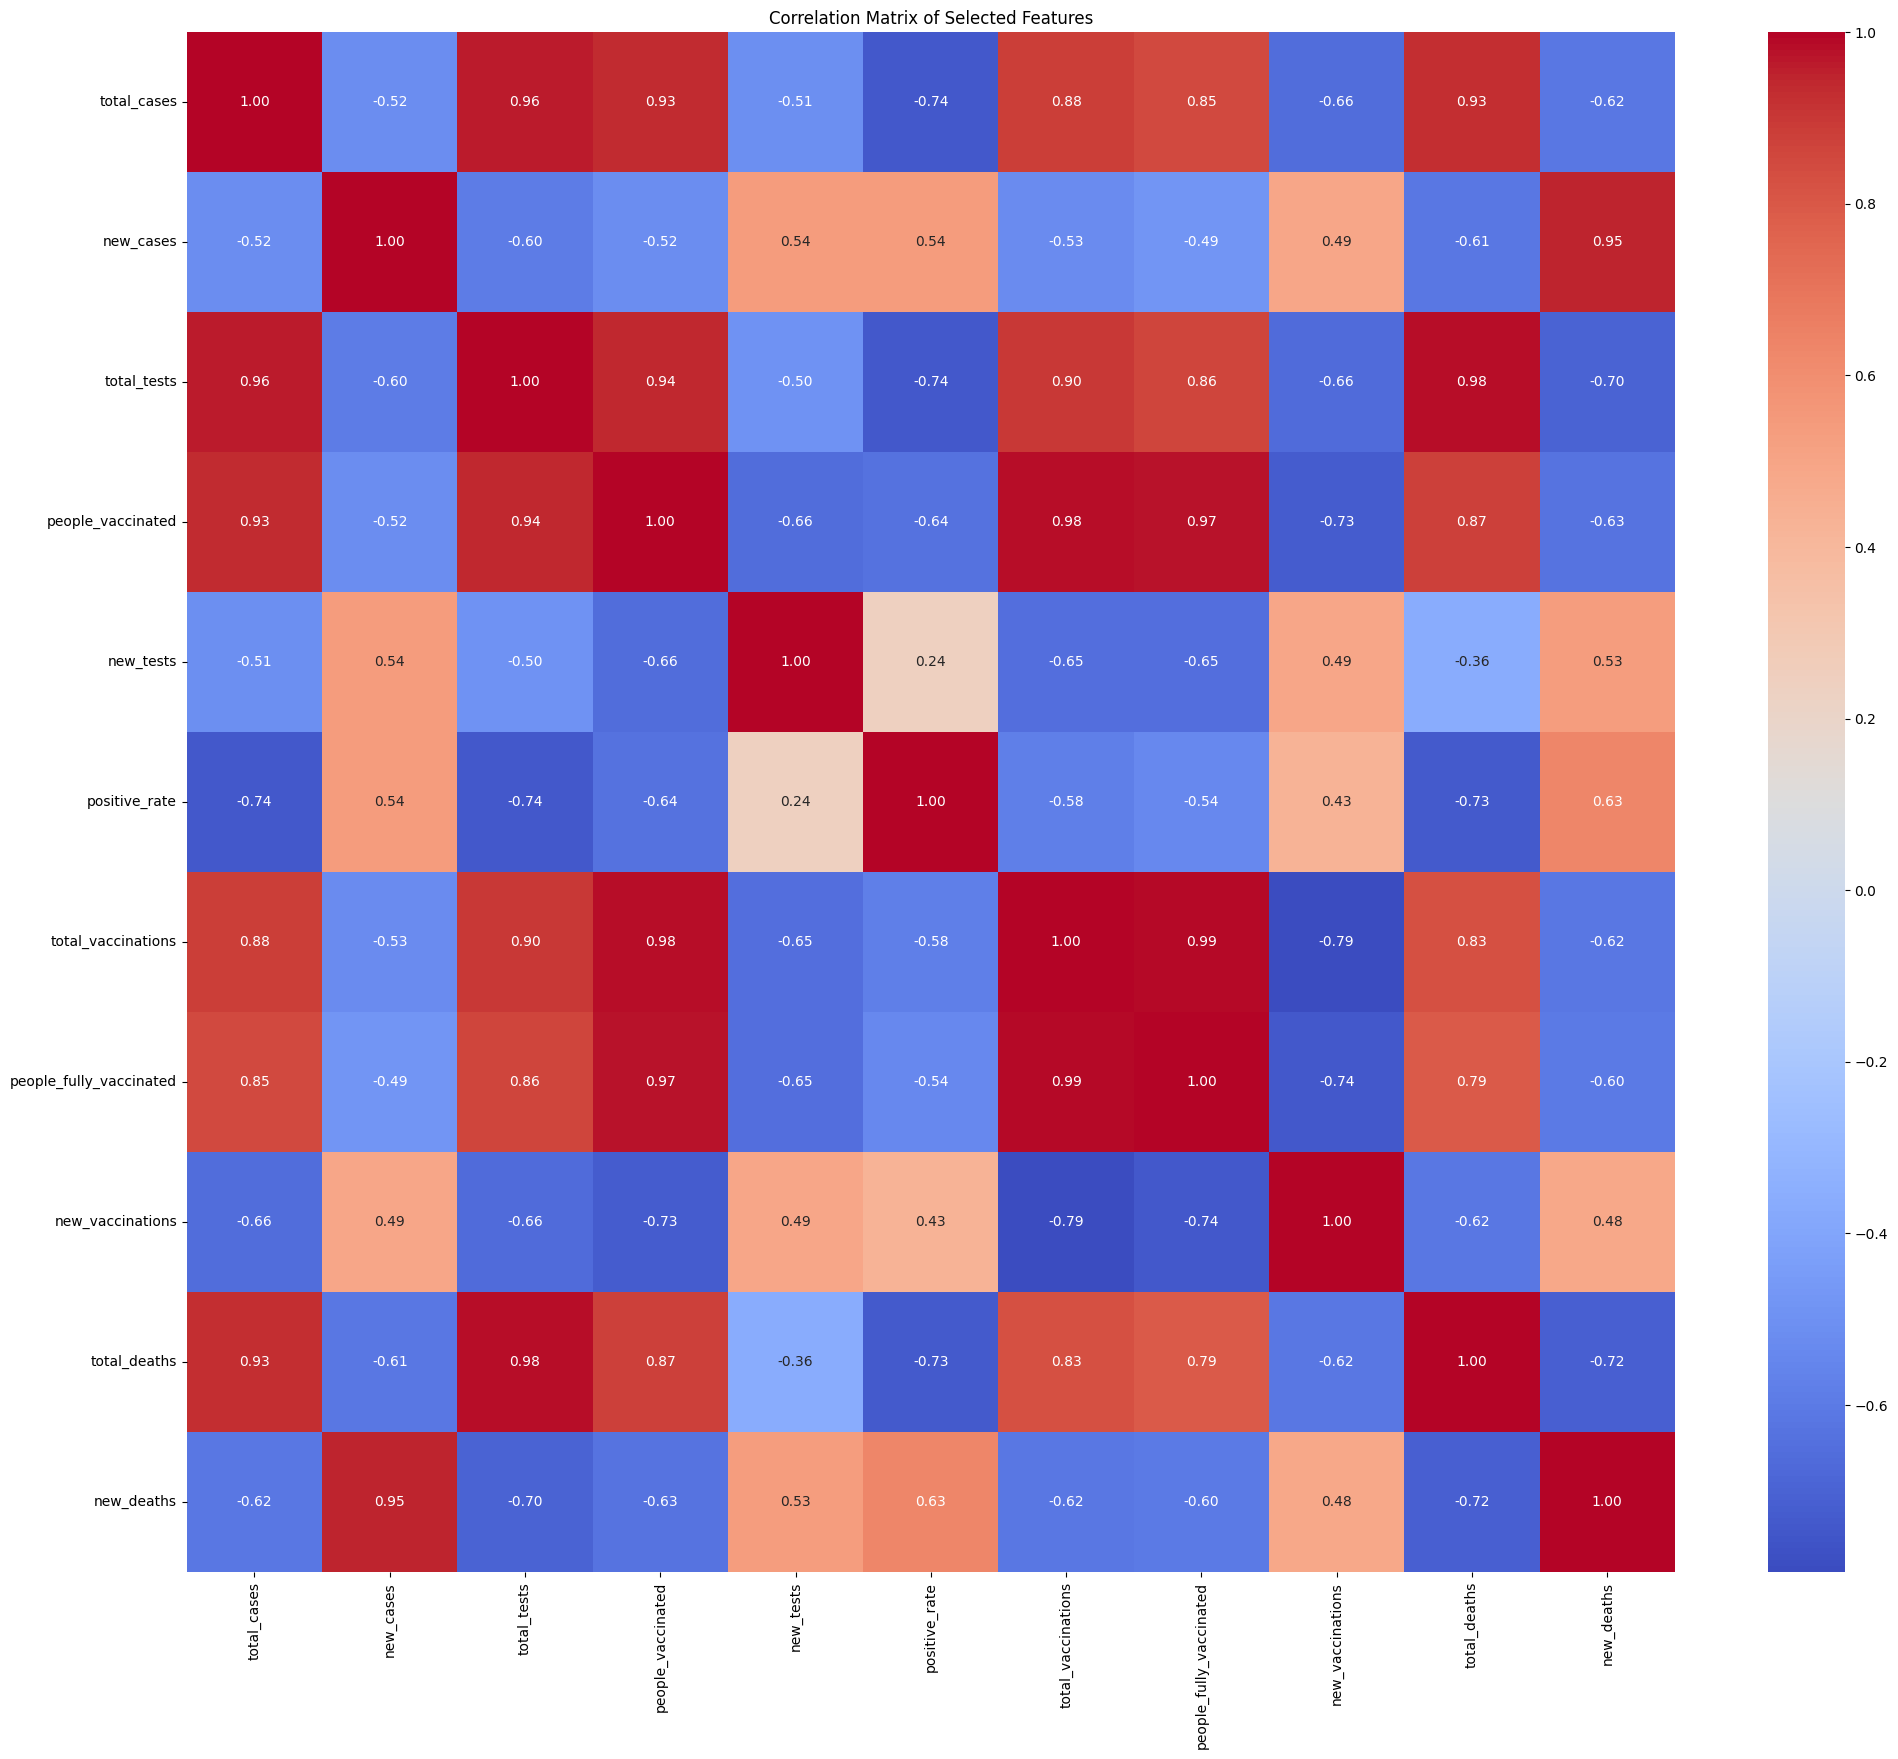

In [30]:
#HeatMap
plt.figure(figsize=(24,20))
sns.heatmap(df_cleaned[filtered_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

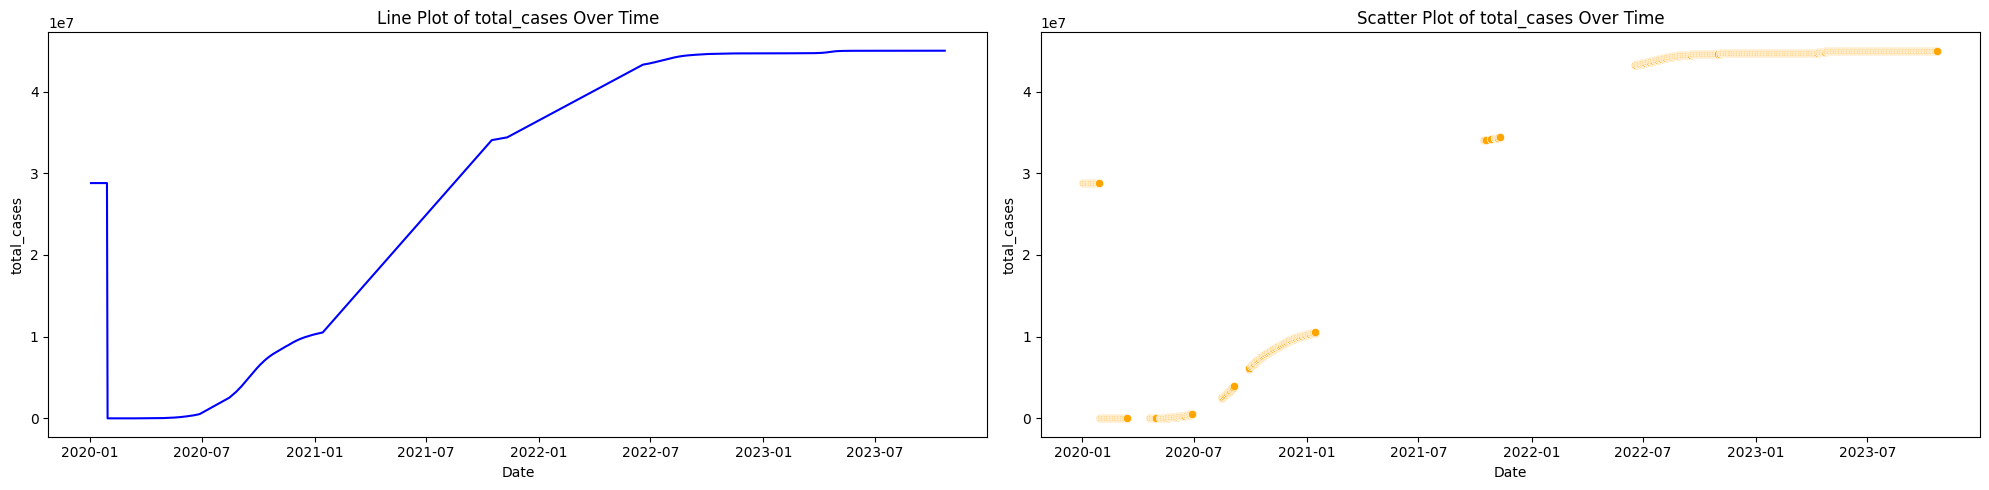

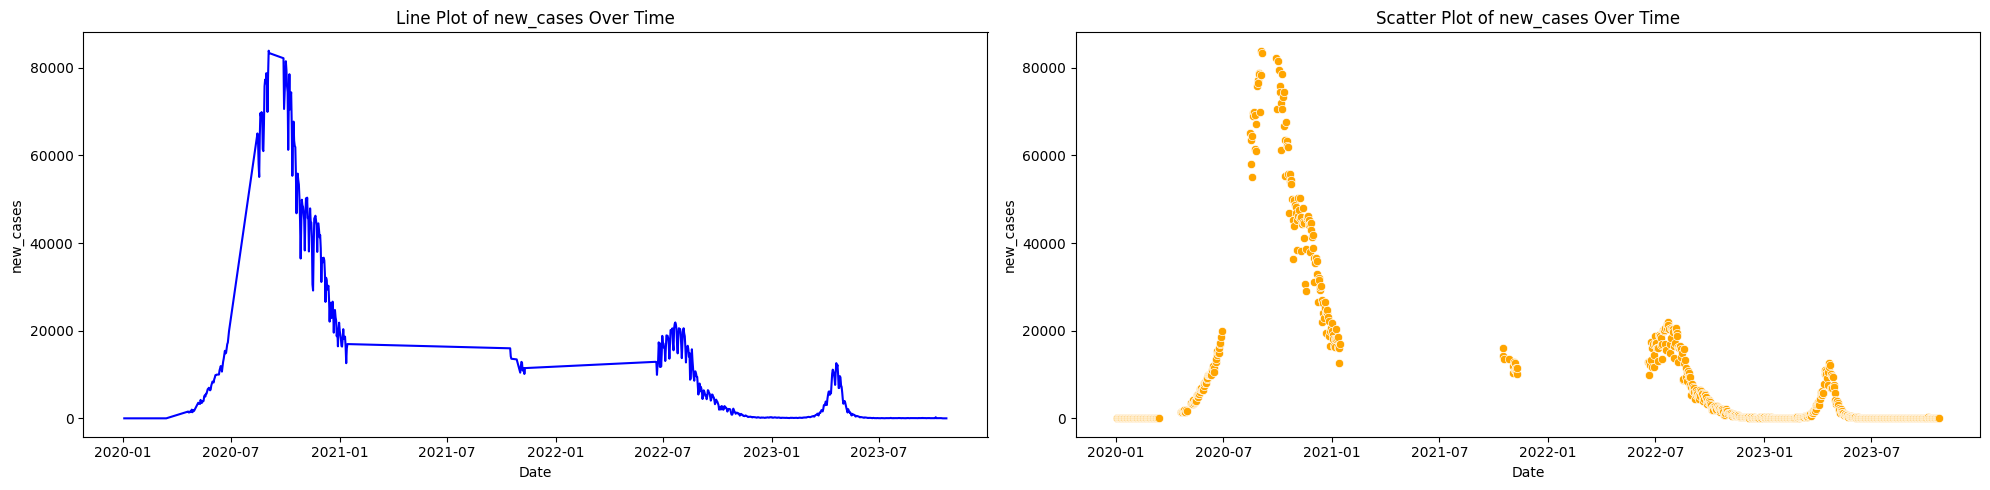

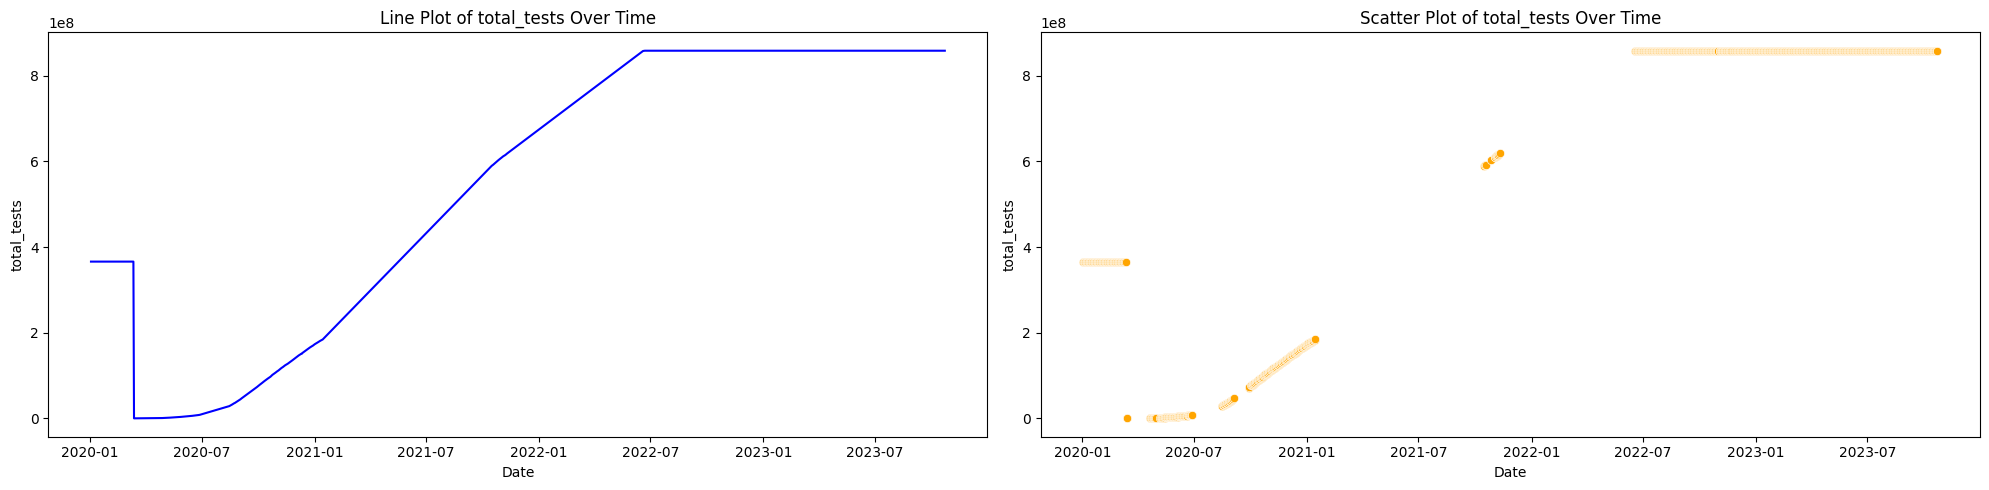

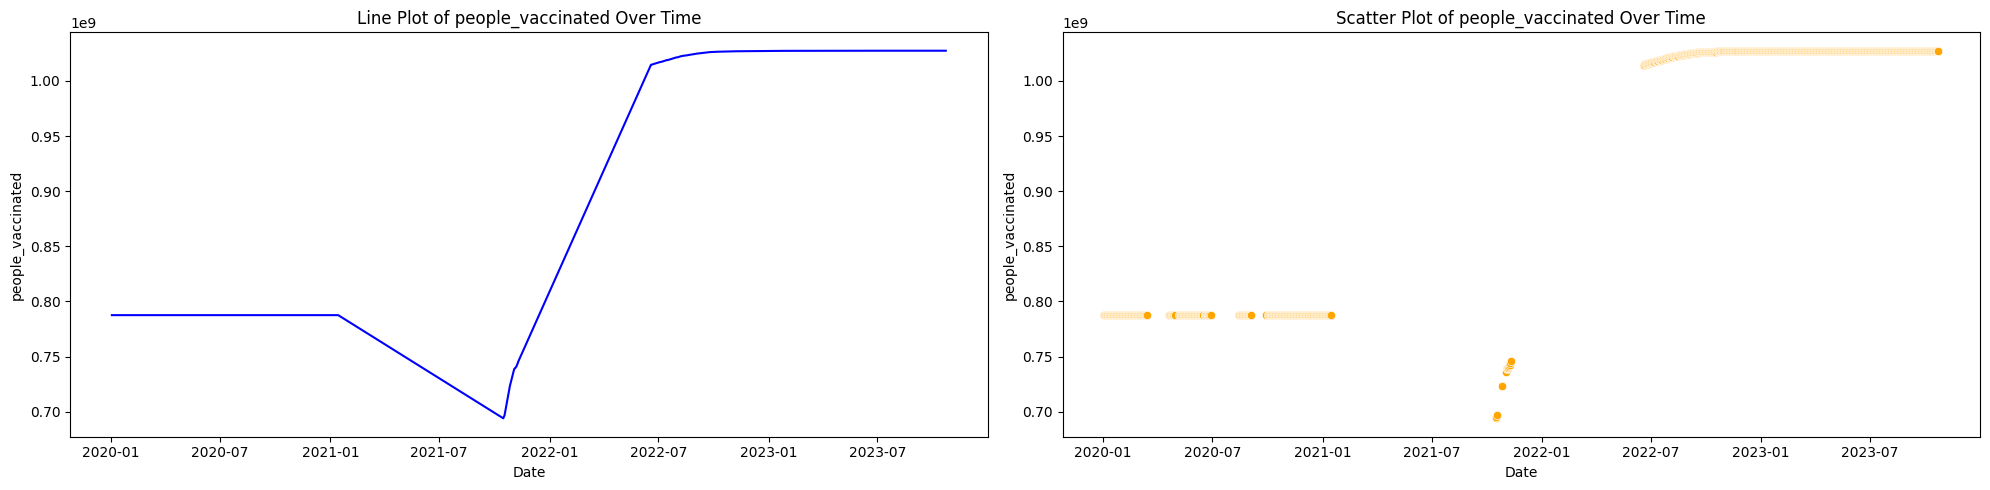

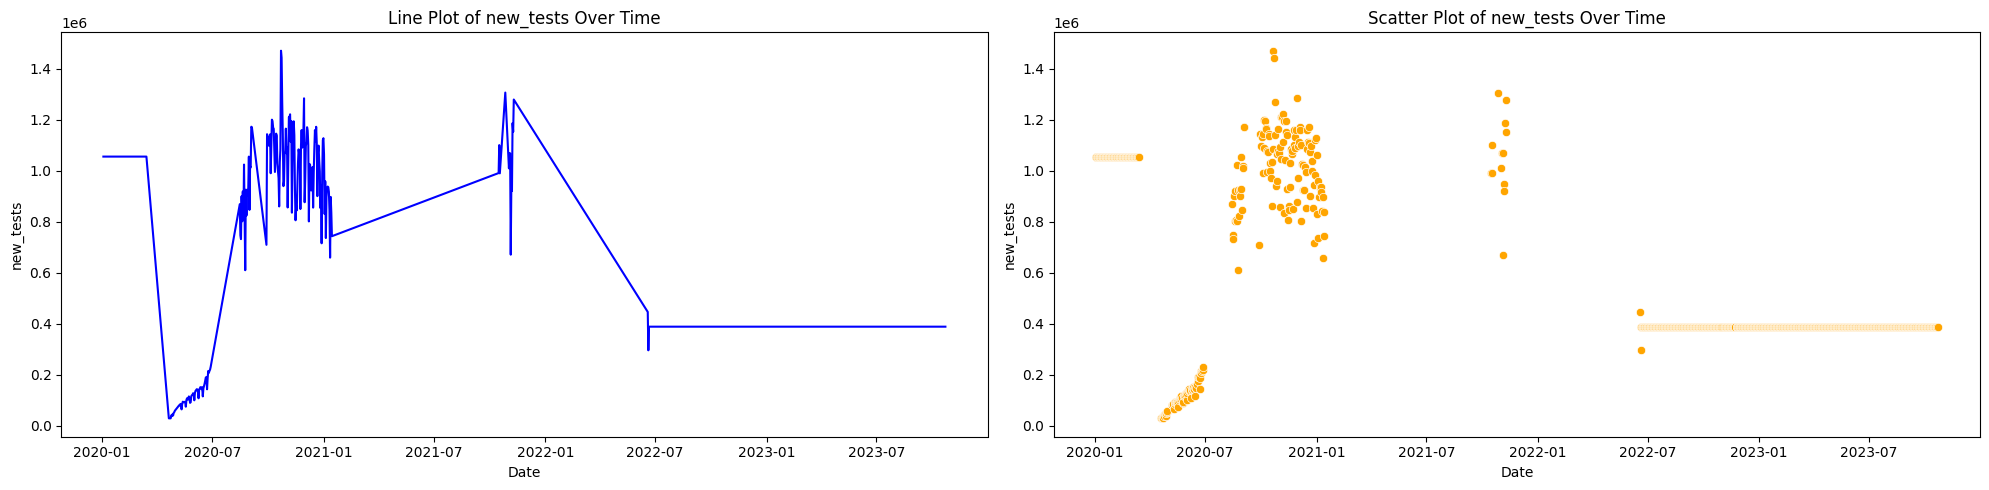

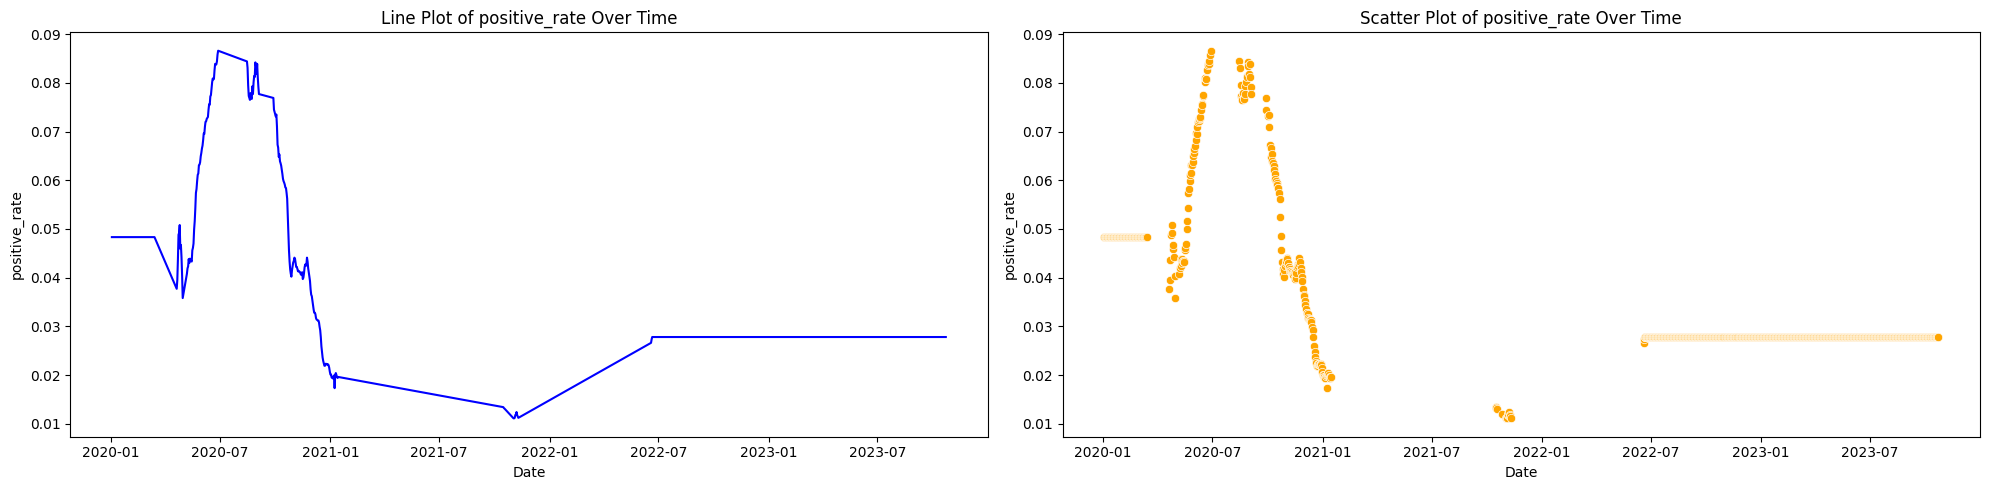

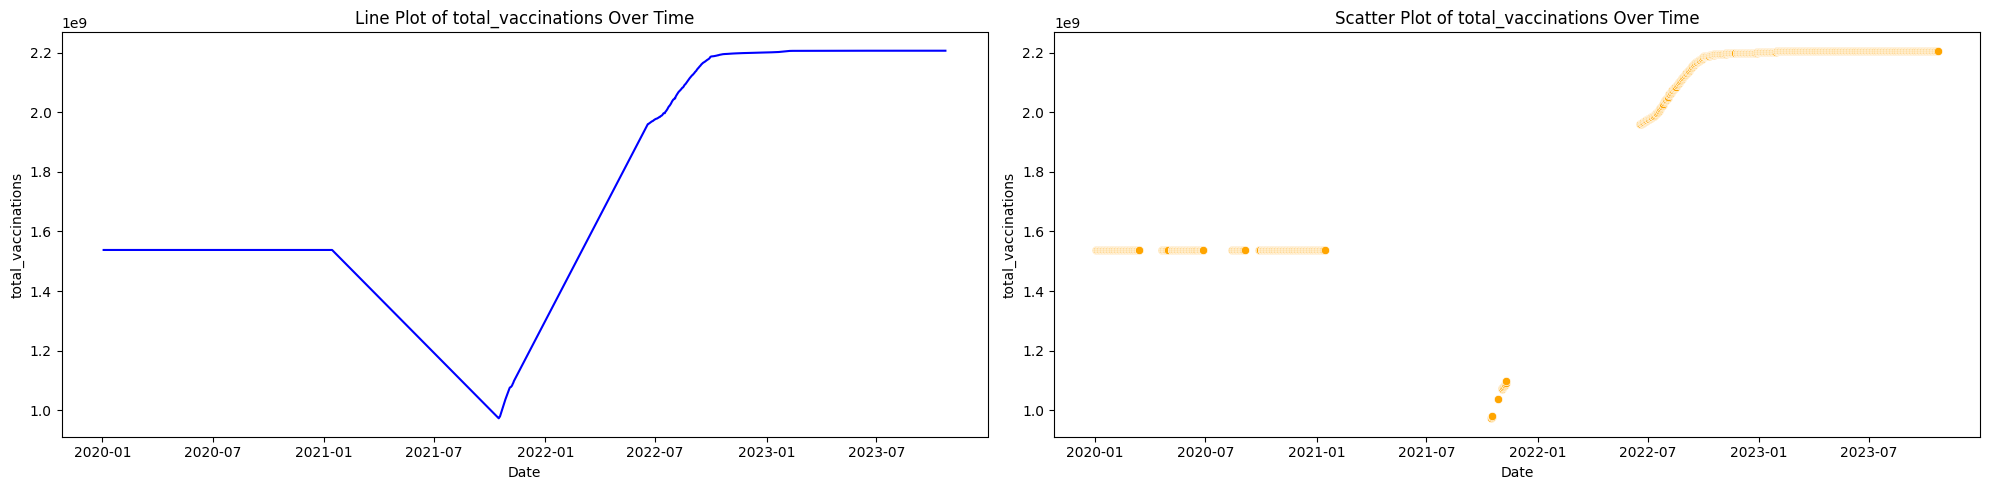

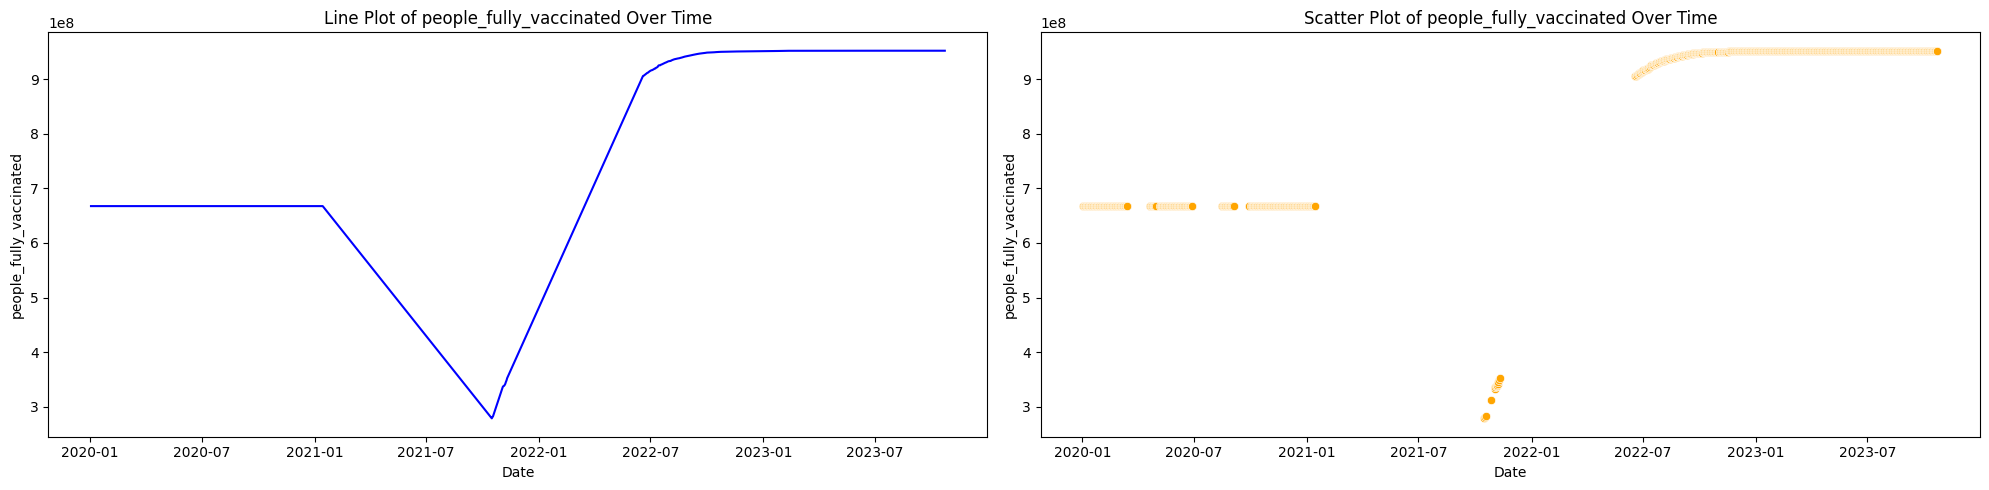

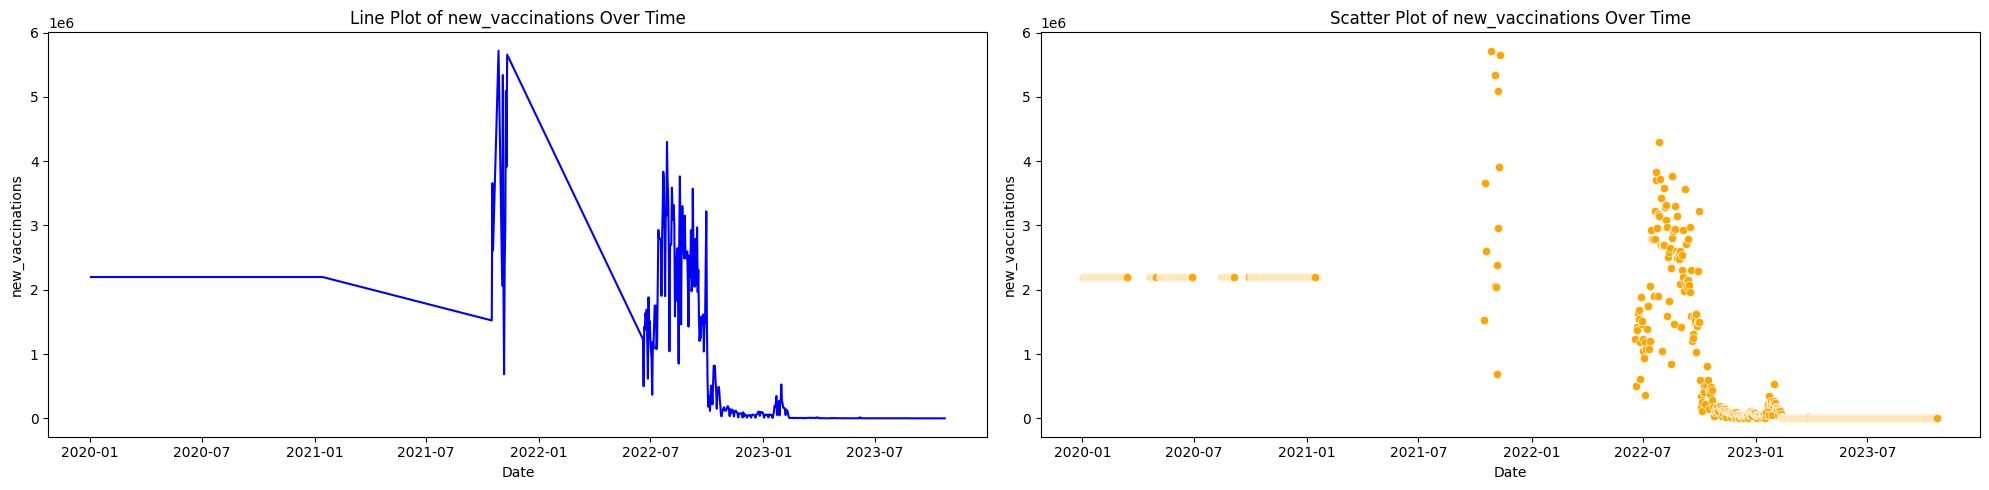

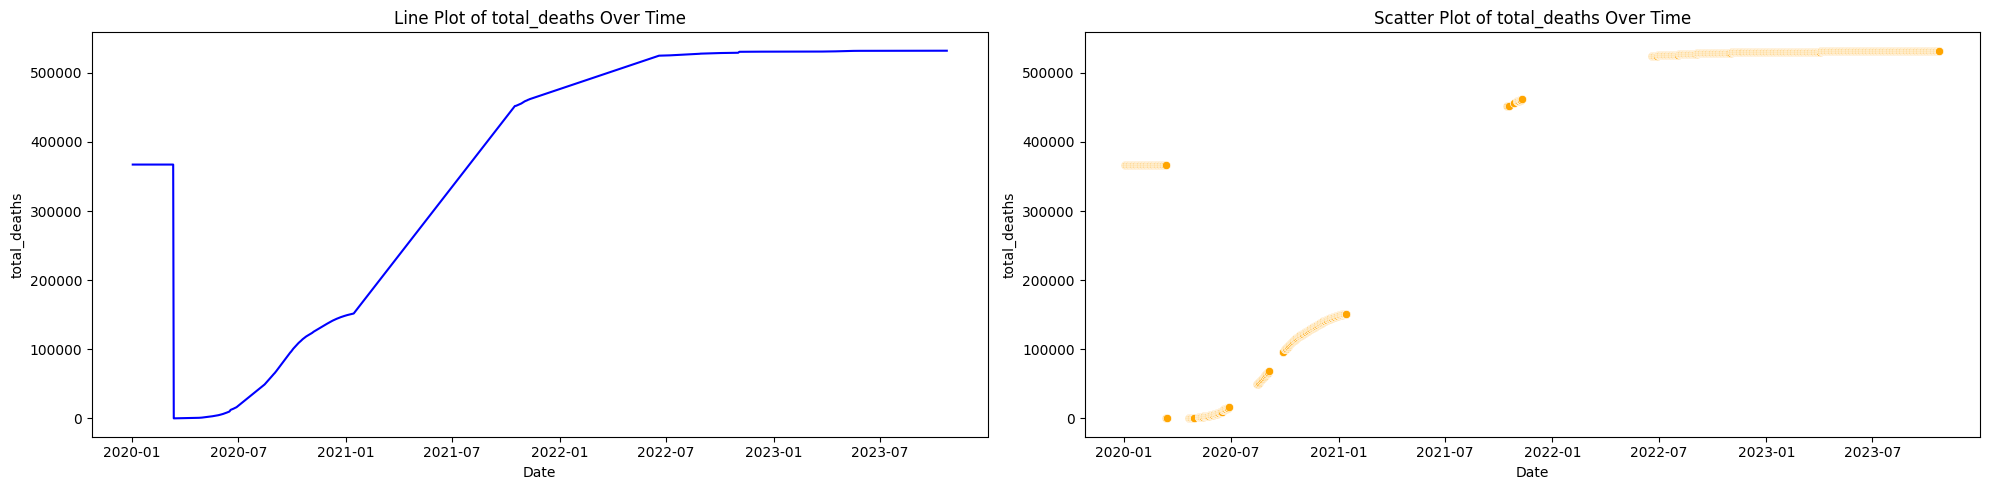

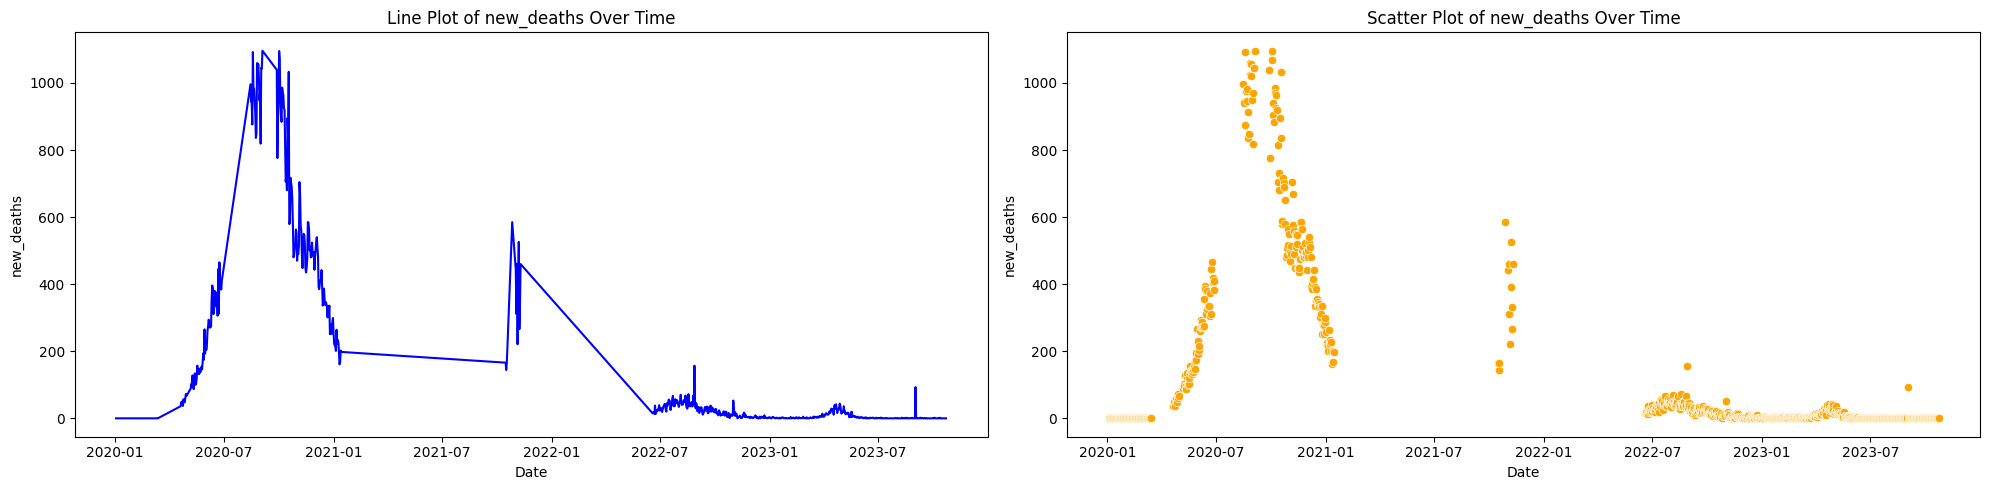

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d-%m-%Y')

# Remove specific features from selected_features

# Iterate over all filtered features
for column in filtered_features:
    plt.figure(figsize=(20,5))

    # Line plot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
    plt.plot(df_cleaned['date'], df_cleaned[column], color='blue')
    plt.title(f'Line Plot of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)

    # Scatter plot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
    sns.scatterplot(x=df_cleaned['date'], y=df_cleaned[column], color='orange')
    plt.title(f'Scatter Plot of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)



    plt.tight_layout()
    plt.show()


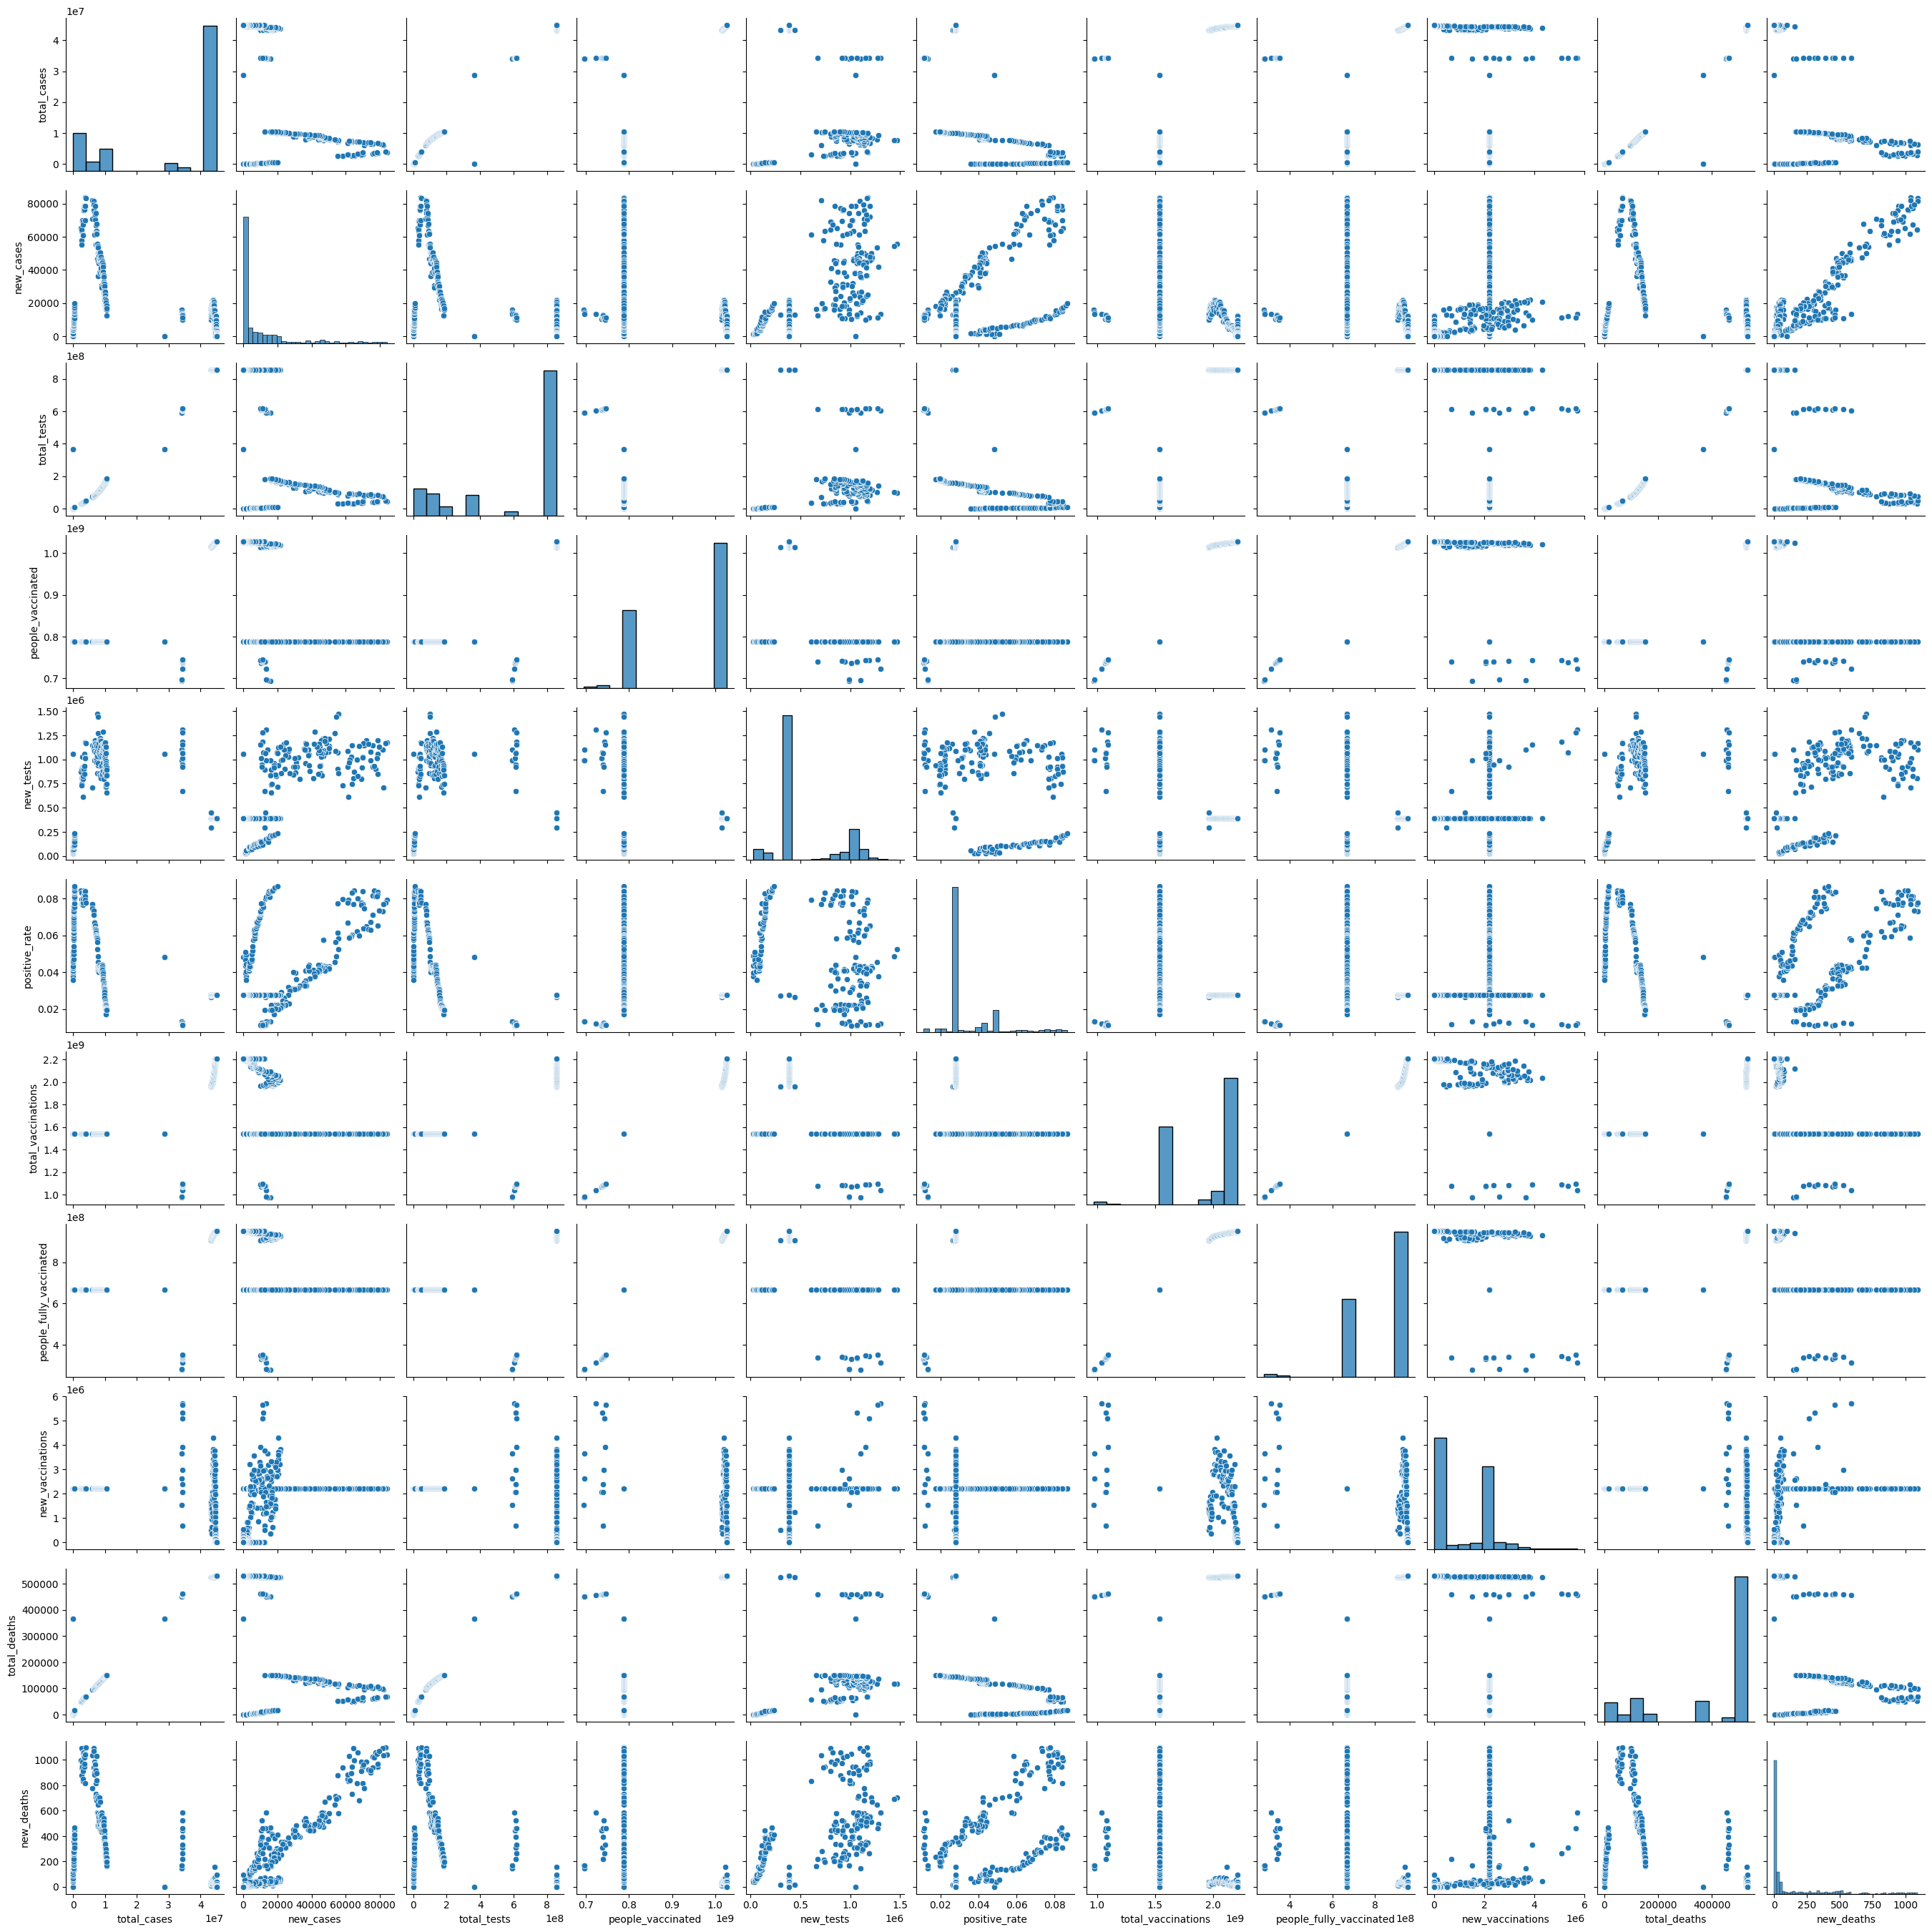

In [32]:
sns.pairplot(df_cleaned[filtered_features])
plt.show()

## Feature Selection

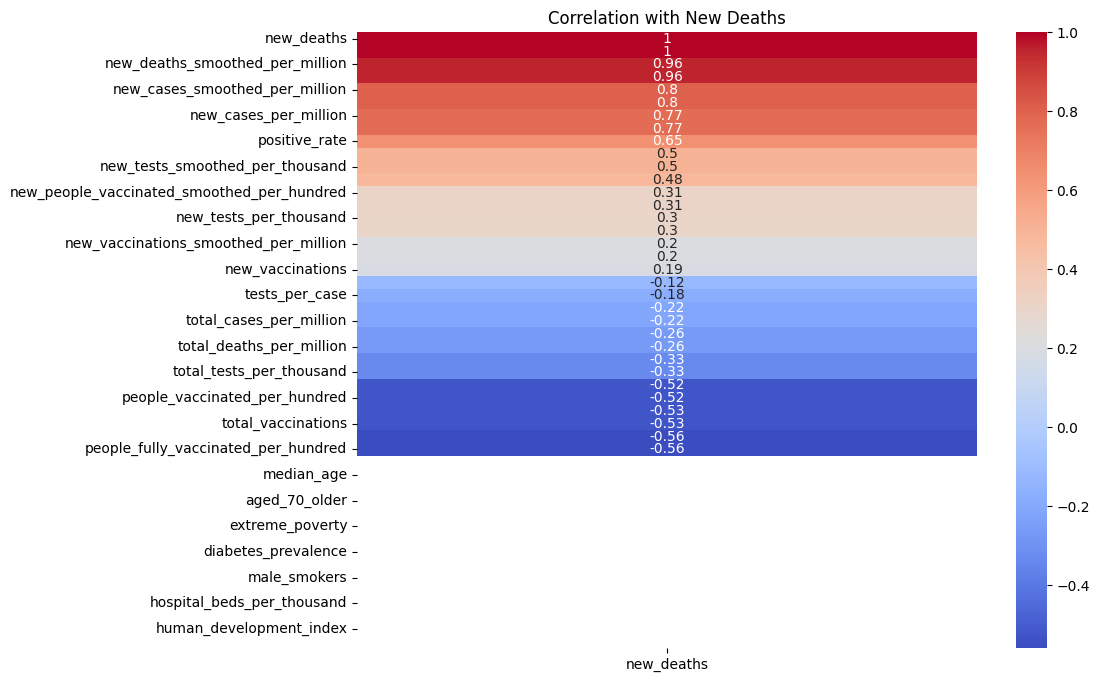

Top Selected Features: ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'total_vaccinations', 'people_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'stringency_index']


In [213]:
df = df.drop(['date', 'tests_units'], axis=1, errors='ignore')

# Step 1: Correlation Analysis
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['new_deaths']].sort_values(by='new_deaths', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with New Deaths")
plt.show()

# Step 2: Feature Importance Using Random Forest
X = df.drop('new_deaths', axis=1)
y = df['new_deaths']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Step 3: Select Top K Features Using Mutual Information
selector = SelectKBest(mutual_info_regression, k=20)  # Select top 20 features
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("Top Selected Features:", list(selected_features))


## Model Building

### ARIMA Model

In [230]:

result = adfuller(df['new_deaths'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# If p-value > 0.05, data is non-stationary; apply differencing


ADF Statistic: -3.204677196079222
p-value: 0.019715536018882623


In [231]:
# # Apply first differencing
# df['new_deaths_diff'] = df['new_deaths'].diff().dropna()

# result_diff = adfuller(df['new_deaths_diff'].dropna())
# print('ADF Statistic after differencing:', result_diff[0])
# print('p-value after differencing:', result_diff[1])


The results after first differencing indicate that the data is now stationary because:

* The ADF Statistic is less than the critical values (e.g., -2.9 for 5% significance).
* The p-value (0.0001) is much less than 0.05, so we reject the null hypothesis of non-stationarity.
This means your target variable (new_deaths_diff) is ready for ARIMA modeling

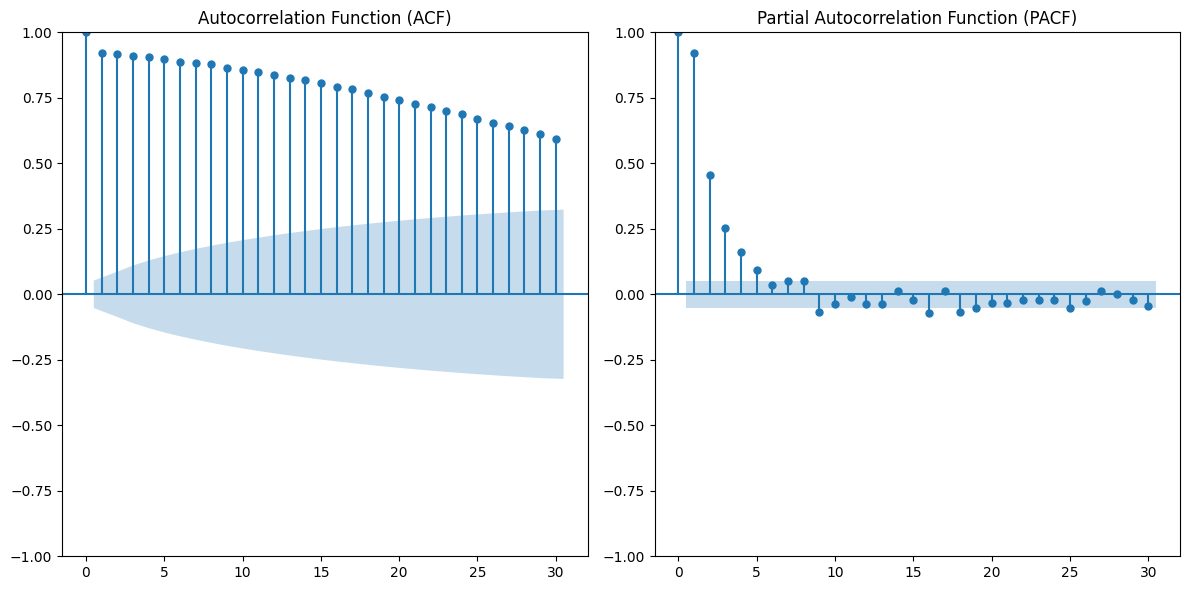

In [232]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['new_deaths'].dropna(), lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(df['new_deaths'].dropna(), lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


From this PACF plot, you can start with p=4.From your ACF Plot, determine q, (e.g., start with 𝑞=1 or q=2).

Now that your data is stationary, you can proceed to:

Identify ARIMA parameters (p, d, q):

* p (AR term): Number of lag observations in the model.
* d (Differencing): Already determined as 1 (first difference).
* q (MA term): Number of lagged forecast errors in the model.

Use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to determine 𝑝, 𝑞 and d.



In [233]:
model = ARIMA(df['new_deaths'], order=(4, 0, 0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             new_deaths   No. Observations:                 1390
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -9651.668
Date:                Tue, 03 Dec 2024   AIC                          19315.337
Time:                        20:54:41   BIC                          19346.759
Sample:                             0   HQIC                         19327.087
                               - 1390                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        382.7603    441.021      0.868      0.385    -481.626    1247.146
ar.L1          0.3414      0.009     39.431      0.000       0.324       0.358
ar.L2          0.2772      0.009     29.511      0.0

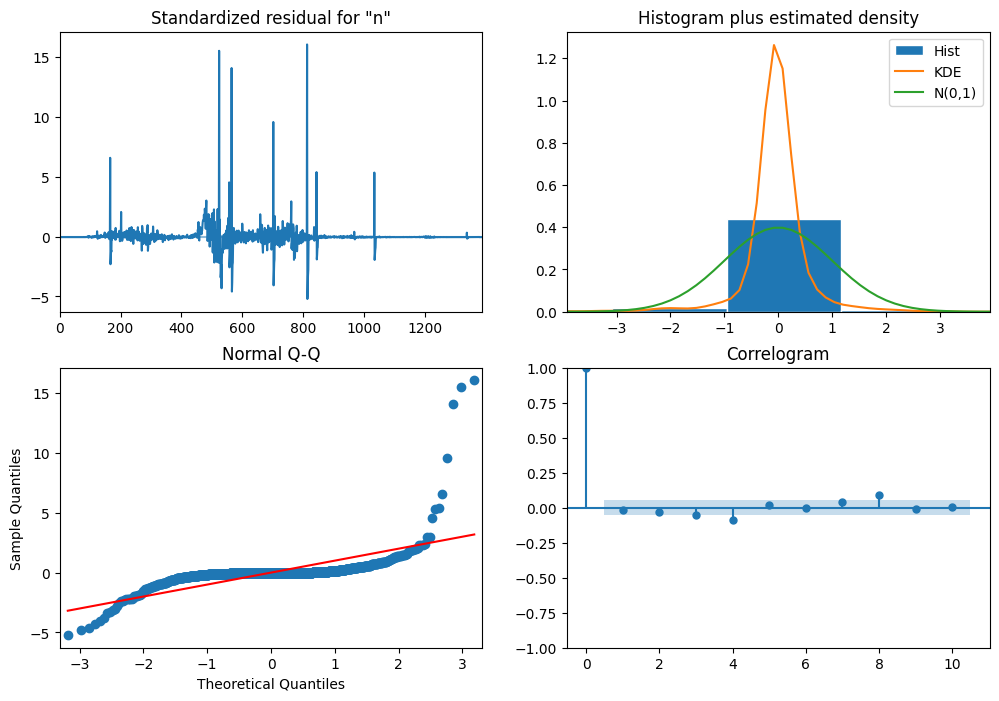

In [234]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


**Standardized Residuals (Top-Left)**
* What it shows: This plot displays the residuals (differences between actual and predicted values) standardized to have a mean of 0 and a standard deviation of 1.
* What to look for:
The residuals should resemble white noise (no clear pattern).
They should be evenly distributed around zero without trends or clustering

**Histogram + KDE (Top-Right)**
* What it shows: A histogram of the residuals with a Kernel Density Estimate (KDE) overlay, and a QQ plot comparison with the normal distribution.
* What to look for:
The residuals should follow a normal distribution.
The histogram should appear bell-shaped, and the QQ plot should form a straight diagonal line.

**QQ Plot (Bottom-Left)**
* What it shows: A Quantile-Quantile (QQ) plot comparing the quantiles of the residuals to the theoretical quantiles of a normal distribution.
* What to look for:
If the residuals are normally distributed, the points should align closely with the diagonal line.
Deviations from the line suggest non-normality in the residuals.

**Correlogram (ACF of Residuals) (Bottom-Right)**
* What it shows: The autocorrelation of residuals plotted as a function of lag.
* What to look for:
The autocorrelations should be close to zero at all lags (no significant correlation).
Residuals with significant autocorrelations suggest that the model has not captured all patterns in the data.


In [235]:
forecast = model_fit.forecast(steps=10)
print("Forecasted values:", forecast)


Forecasted values: 1390    10.636321
1391    14.267527
1392    18.455708
1393    22.919619
1394    28.030341
1395    32.402748
1396    36.845737
1397    41.276387
1398    45.687078
1399    49.980652
Name: predicted_mean, dtype: float64


In [219]:
fitted_values = model_fit.fittedvalues
actual_values = df['new_deaths'][fitted_values.index]

mae = mean_absolute_error(actual_values, fitted_values)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 80.07510321287549


In [220]:
actual_values_for_rmse = df['new_deaths'][fitted_values.index]

rmse = np.sqrt(mean_squared_error(actual_values_for_rmse, fitted_values))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 250.76261640613157


In [221]:
train_size = int(len(df['new_deaths']) * 0.8)
train, test = df['new_deaths'][:train_size], df['new_deaths'][train_size:]

model = ARIMA(train, order=(4, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))


In [222]:
mae_test = mean_absolute_error(test, forecast)
print("Out-of-Sample Mean Absolute Error (MAE):", mae_test)

rmse_test = np.sqrt(mean_squared_error(test, forecast))
print("Out-of-Sample Root Mean Squared Error (RMSE):", rmse_test)


Out-of-Sample Mean Absolute Error (MAE): 4.568049416169409
Out-of-Sample Root Mean Squared Error (RMSE): 10.599362197047139


In [223]:
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mape = mean_absolute_percentage_error(test, forecast)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")


Mean Absolute Percentage Error (MAPE): 373298409977.9151 %


### LSTM model

In [138]:

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[['new_deaths']])

data_scaled = pd.DataFrame(data_scaled, columns=['new_deaths'])

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 10
X, y = create_sequences(data_scaled['new_deaths'].values, n_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [139]:

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0205 - val_loss: 0.0033
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0

In [140]:
y_pred = model.predict(X_test)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred)

mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Mean Squared Error (MSE): 73183.0627288475
Mean Absolute Error (MAE): 87.79478458736254


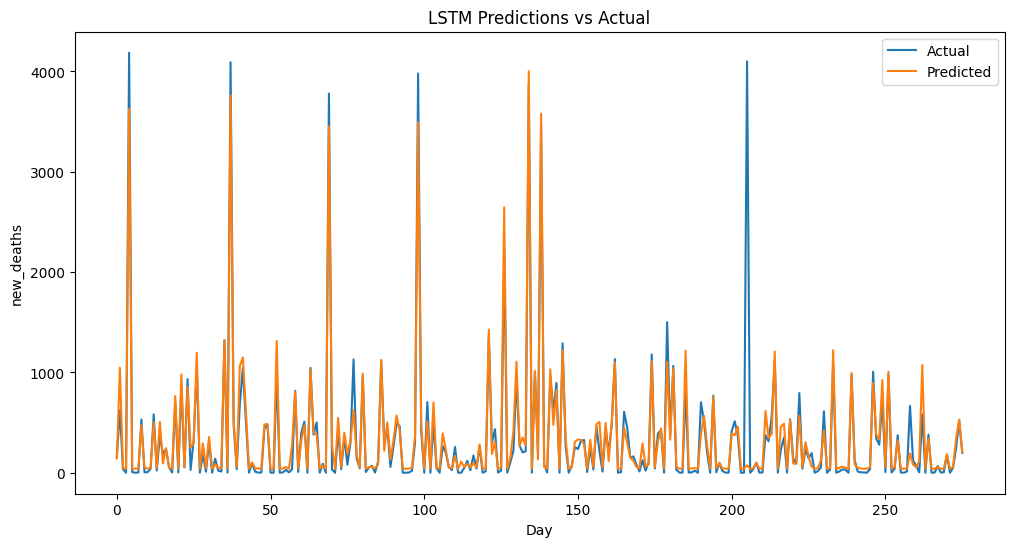

In [141]:
plt.figure(figsize=(12,6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Day')
plt.ylabel('new_deaths')
plt.legend()
plt.show()

In [142]:
n_forecast = 10

input_seq = data_scaled['new_deaths'].values[-n_steps:].reshape(1, n_steps, 1)

forecast = []
for i in range(n_forecast):
    pred = model.predict(input_seq)
    forecast.append(pred[0, 0])
    input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
forecast_original = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))


forecast_dates = pd.date_range(start=df_india['date'].iloc[-1], periods=n_forecast + 1, freq='D')[1:]

forecast_df = pd.DataFrame(forecast_original, index=forecast_dates, columns=['forecasted_new_deaths'])

print(forecast_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
            forecasted_new_deaths
2023-10-24              39.248215
2023-10-25              39.874603
2023-10-26              40.830933
2023-10-27              41.963112
2023-10-28              43.154118
2023-10-29              44.340233
2023-10-30              45.571976
2023-10-31              47.175671
2023-11-01              49.298706
2023-11-02              51.832783


### XGboost

In [143]:
df['date']=df_india['date']

In [144]:
df['date'] = pd.to_datetime(df_india['date'], format='%d-%m-%Y') # Specify the correct date format
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

selected_features = ['day', 'month', 'year']  # Add other features if available
X = df[selected_features]
y = df['new_deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 77.69904639727349
Mean Squared Error (MSE): 28504.922938642056
Root Mean Squared Error (RMSE): 168.83401001765625
R-squared (R²): 0.9243428338531494


In [145]:
def forecast_future(model, last_known_values, n_days):
    forecast = []
    current_input = np.array(last_known_values).reshape(1, -1)

    for _ in range(n_days):
        next_value = model.predict(current_input)[0]
        forecast.append(next_value)


        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1] = next_value

    return forecast

last_known_values = X_test.iloc[-1].values

forecasted_values = forecast_future(model, last_known_values, n_days=10)

print("Forecasted Values for the next 10 days:")
print(forecasted_values)

Forecasted Values for the next 10 days:
[449.11996, 393.33173, 275.8605, 275.8605, 275.8605, 275.8605, 275.8605, 275.8605, 275.8605, 275.8605]
